# Cardio Catch Diseases (CCD)
## Predicting cardiovascular disease
---

# Imports

In [112]:
# general utilities
import GeneralUtils as gu
import pickle

# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import MinMaxScaler

# feature selection
from boruta import BorutaPy
from sklearn.ensemble import ExtraTreesClassifier

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# model evaluation
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Helper functions

In [2]:
# disable max columns limit
pd.set_option('display.max_columns', 70)

# sets to not crop long vlaues for rows
pd.set_option("display.max_colwidth", 70)

# sets format to suppress scientific notation
pd.options.display.float_format = '{:,.6f}'.format

# sets seaborn default style
sns.set()

# sets global SEED
SEED = 42

# 1.0 The context and understanding the business

References are stated at the end of this section.

## 1.1 What is Cardiovascular Diseases (CVDs)?

Cardiovascular disease can refer to a number of conditions:

### 1.1.1 Heart disease

Heart and blood vessel disease (also called heart disease) includes numerous problems, many of which are related to a process called atherosclerosis.

Atherosclerosis is a condition that develops when a substance called plaque builds up in the walls of the arteries. This buildup narrows the arteries, making it harder for blood to flow through. If a blood clot forms, it can block the blood flow. This can cause a heart attack or stroke.

### 1.1.2 Heart attack

A heart attack occurs when the blood flow to a part of the heart is blocked by a blood clot. If this clot cuts off the blood flow completely, the part of the heart muscle supplied by that artery begins to die.

Most people survive their first heart attack and return to their normal lives, enjoying many more years of productive activity. But experiencing a heart attack does mean that you need to make some changes.

The medications and lifestyle changes that your doctor recommends may vary according to how badly your heart was damaged, and to what degree of heart disease caused the heart attack.

### 1.1.3 Stroke

An **ischemic stroke** (the most common type of stroke) occurs when a blood vessel that feeds the brain gets blocked, usually from a blood clot.

When the blood supply to a part of the brain is cut off, some brain cells will begin to die. This can result in the loss of functions controlled by that part of the brain, such as walking or talking.

A **hemorrhagic stroke** occurs when a blood vessel within the brain bursts. This is most often caused by uncontrolled hypertension (high blood pressure).

Some effects of stroke are permanent if too many brain cells die after being starved of oxygen. These cells are never replaced.

The good news is that sometimes brain cells don’t die during stroke — instead, the damage is temporary. Over time, as injured cells repair themselves, previously impaired function improves. (In other cases, undamaged brain cells nearby may take over for the areas of the brain that were injured.)

Either way, strength may return, speech may get better and memory may improve. This recovery process is what stroke rehabilitation is all about.

### 1.1.4 Heart failure

Heart failure, sometimes called congestive heart failure, means the heart isn’t pumping blood as well as it should. Heart failure does not mean that the heart stops beating — that’s a common misperception. Instead, the heart keeps working, but the body’s need for blood and oxygen isn’t being met.

Heart failure can get worse if left untreated. If your loved one has heart failure, it’s very important to follow the doctor’s orders.

### 1.1.5 Arrhythmia

Arrhythmia refers to an abnormal heart rhythm. There are various types of arrhythmias. The heart can beat too slow, too fast or irregularly.

Bradycardia, or a heart rate that’s too slow, is when the heart rate is less than 60 beats per minute. Tachycardia, or a heart rate that’s too fast, refers to a heart rate of more than 100 beats per minute.

An arrhythmia can affect how well your heart works. With an irregular heartbeat, your heart may not be able to pump enough blood to meet your body’s needs.

### 1.1.6 Heart valve problems

When heart valves don’t open enough to allow the blood to flow through as it should, a condition called stenosis results. When the heart valves don’t close properly and thus allow blood to leak through, it’s called regurgitation. If the valve leaflets bulge or prolapse back into the upper chamber, it’s a condition called prolapse.

## 1.2 Key Facts (as May/2017)

- CVDs are the number 1 cause of death globally: more people die annually from CVDs than from any other cause.
- An estimated 17.9 million people died from CVDs in 2016, representing 31% of all global deaths. Of these deaths, 85% are due to heart attack and stroke.
- Over three quarters of CVD deaths take place in low- and middle-income countries.
- Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2015, 82% are in low- and middle-income countries, and 37% are caused by CVDs.
- Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management using counselling and medicines, as appropriate.

## 1.3 What are the risk factors for cardiovascular disease?

The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol**. The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity. These “intermediate risks factors” can be measured in primary care facilities and indicate an increased risk of developing a heart attack, stroke, heart failure and other complications.

Cessation of tobacco use, reduction of salt in the diet, consuming fruits and vegetables, regular physical activity and avoiding harmful use of alcohol have been shown to reduce the risk of cardiovascular disease. In addition, drug treatment of diabetes, hypertension and high blood lipids may be necessary to reduce cardiovascular risk and prevent heart attacks and strokes. Health policies that create conducive environments for making healthy choices affordable and available are essential for motivating people to adopt and sustain healthy behaviour.

There are also a number of underlying determinants of CVDs or "the causes of the causes". These are a reflection of the major forces driving **social, economic and cultural** change – globalization, urbanization and population ageing. Other determinants of CVDs include poverty, stress and hereditary factors.

## 1.4 The Cardio Catch Diseases Labs

Cardio Catch Diseases is a company specialized in detecting heart disease in the early stages. Its business model lies in offering an early diagnosis of cardiovascular disease for a certain price.

Currently, the diagnosis of cardiovascular disease is manually made by a team of specialists. The current accuracy of the diagnosis varies between 55% and 65%, due to the complexity of the diagnosis and also the fatigue of the team who take turns to minimize the risks. The cost of each diagnosis, including the devices and the payroll of the analysts, is around $1,000.00.

The price of the diagnosis, paid by the client, varies according to the precision achieved by the team of specialists.

| Exam Accuracy | Price  | Rules                                  | Example          |
|:---------------|:---------------------|:---------------------------------------|:----------------|
| Above 50%     | min \$500\.00          | \+\$500 for each additional 5% accuracy | Accuracy = 55% \-> \$1,000\.00 |
| Up to 50%     | $0\.00                | N/A                                    | N/A               |

Thus, we see that **different values in the exam precision**, given by the team of specialists, make the company either have a profitable operation, revenue greater than the cost, or an operation with a loss, revenue less than the cost. This instability of the diagnosis makes the company to have an **unpredictable cashflow**.

## References

### Context
- https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease
- https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

### Business problem
- https://sejaumdatascientist.com/projeto-de-data-science-diagnostico-precoce-de-doencas-cardiovasculares/

### Supplementary Materials
- https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(19)30318-3/fulltext

# 2.0 Checking the data set

## 2.1 Data Dictionary

The data set that we're using is from Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).

There are 3 types of input features:

- **Objective:** factual information;
- **Examination:** results of medical examination;
- **Subjective:** information given by the patient.


| Feature                                       | Type                | Feature Name | Data Type                                             |
|:---------------------------|:---------------|:--------------|:------------------------------------|
| Age                                           | Objective Feature   | age          | int \(days\)                                     |
| Height                                        | Objective Feature   | height       | int \(cm\)                                       |
| Weight                                        | Objective Feature   | weight       | float \(kg\)                                     |
| Gender                                        | Objective Feature   | gender       | categorical code                                 |
| Systolic blood pressure                       | Examination Feature | ap\_hi       | int                                              |
| Diastolic blood pressure                      | Examination Feature | ap\_lo       | int                                              |
| Cholesterol                                   | Examination Feature | cholesterol  | 1: normal, 2: above normal, 3: well above normal |
| Glucose                                       | Examination Feature | gluc         | 1: normal, 2: above normal, 3: well above normal |
| Smoking                                       | Subjective Feature  | smoke        | binary                                           |
| Alcohol intake                                | Subjective Feature  | alco         | binary                                           |
| Physical activity                             | Subjective Feature  | active       | binary                                           |
| Presence or absence of cardiovascular disease | Target Variable     | cardio       | binary                                           |


For binary data, we'll assume that:
- `0` = no
- `1` = yes

### 2.1.1 Some theory behind blood pressure

### What do the numbers mean?

Everyone would like to have healthy blood pressure. But what exactly does that mean?

When your doctor takes your blood pressure, it’s expressed as a measurement with two numbers, with one number on top (**systolic**) and one on the bottom (**diastolic**), like a fraction. For example, 120/80 mm Hg.

The top number refers to the amount of pressure in your arteries during the contraction of your heart muscle. This is called systolic pressure.

The bottom number refers to your blood pressure when your heart muscle is between beats. This is called diastolic pressure.

Both numbers are important in determining the state of your heart health.

Numbers greater than the ideal range indicate that your heart is working too hard to pump blood to the rest of your body.

<img src="img/9842-blood-pressure-readings-explained-1296x1645-body.20181002181105178.jpg" width="480">

### What’s a normal reading?

For a normal reading, your blood pressure needs to show a top number (systolic pressure) that’s between 90 and less than 120 and a bottom number (diastolic pressure) that’s between 60 and less than 80. The American Heart Association (AHA) considers blood pressure to be within the normal range when both your systolic and diastolic numbers are in these ranges.

Blood pressure readings are expressed in millimeters of mercury. This unit is abbreviated as mm Hg. A normal reading would be any blood pressure below 120/80 mm Hg and above 90/60 mm Hg in an adult.

If you’re in the normal range, no medical intervention is needed. However, you should maintain a healthy lifestyle and healthy weight to help prevent hypertension from developing. Regular exercise and healthy eating can also help. You may need to be even more mindful of your lifestyle if hypertension runs in your family.

### Elevated blood pressure

Numbers higher than 120/80 mm Hg are a red flag that you need to take on heart-healthy habits.

When your systolic pressure is between 120 and 129 mm Hg and your diastolic pressure is less than 80 mm Hg, it means you have elevated blood pressure.

Although these numbers aren’t technically considered high blood pressure, you’ve moved out of the normal range. Elevated blood pressure has a good chance of turning into actual high blood pressure, which puts you at an increased risk of heart disease and stroke.

No medications are necessary for elevated blood pressure. But this is when you should adopt healthier lifestyle choices. A balanced diet and regular exercise can help lower your blood pressure to a healthy range and help prevent elevated blood pressure from developing into full-fledged hypertension.

### Diagnosing Hypertension

One high blood pressure reading is not enough for a diagnosis of hypertension. Most people will have higher readings when under physical or emotional stress. Blood pressure should be measured when you are relaxed and rested. Listed below are several ways to find out whether you have hypertension.
Your doctor

A doctor will diagnose hypertension right away if your **blood pressure is extremely high (higher than 200/120 mmHg)**. If your blood pressure is higher than 180/110 mmHg, then your doctor will be able to diagnose you with hypertension after just two visits over a short period of time. If your blood pressure is higher than 160/100 mmHg, then three visits are enough. If your blood pressure is higher than 140/90 mmHg, then five visits are needed before a diagnosis can be made. If either your systolic or diastolic blood pressure stays high, then the diagnosis of hypertension can be made. The diagnosis can also be made if you have diabetes or kidney disease and a blood pressure higher than 130/80 mmHg.

If your systolic pressure is elevated and your diastolic pressure is not, that doesn’t mean you have isolated systolic hypertension. It most likely means you have standard high blood pressure.

While the definition can vary by a person's age, weight, and health, isolated systolic hypertension is usually diagnosed when the **systolic value is extremely high, often close to 200 mmHg**.

"Regular" high blood pressure is typically diagnosed when used an adult has a systolic blood pressure of 130mmHg or higher and/or a diastolic pressure of 80mmHg or above. Your doctor will be able to tell the difference. 

### And low blood pressure?

Low blood pressure does not have a specific number where it is too low. Most doctors consider blood pressure to be too low when it causes symptoms or drops suddenly. In general, low blood pressure symptoms happen when **blood pressure is less than 90/60** mmHg.

The causes of low blood pressure can range from dehydration to serious medical disorders. It's important to find out what's causing your low blood pressure so that it can be treated.

In one of the observational studies, published Oct. 16, 2016, in the **Journal of the American College of Cardiology**, researchers analyzed the medical records of more than 11,000 adults collected over a period of three decades as part of the Atherosclerosis Risk in Communities (ARIC) Study. They found that people who had **low diastolic blood pressure (60 to 69 mm Hg)** were twice as likely to have subtle evidence of **heart damage** compared with people whose diastolic blood pressure was 80 to 89 mm Hg. Low diastolic values were also linked with a higher risk of heart disease and death from any cause over 21 years.

For the second, published Oct. 29, 2016, in The Lancet, researchers analyzed data from CLARIFY, a registry of more than 22,600 people with heart disease from 45 countries. They determined that, compared with people who had systolic blood pressure of 120 to 139 mm Hg and diastolic pressure of 70 to 79, people with a systolic blood pressure of 140 mm Hg or higher were more likely to experience heart attacks or strokes, to be hospitalized with heart failure, or to die within a five-year period. But the same was true for **heart attacks, heart failure, and death in people with low blood pressure (systolic pressure below 120 mm Hg and diastolic pressure under 70 mm Hg)**.

In an analysis published online April 5, 2017, by The Lancet, German researchers pooled data from two clinical trials involving 31,000 men and women ages 55 or older who had cardiovascular disease or advanced diabetes. Participants were assigned to take either ramipril (Altace), telmisartan (Micardis, Activin), both drugs, or neither drug for about five years. The researchers determined that systolic pressures below 120 mm Hg and diastolic pressures below 70 mm Hg were associated with an increased risk of dying from heart disease or any cause compared with systolic pressures between 120 mm Hg and 140 mm Hg and diastolic pressures between 70 and 80 mm Hg. Diastolic pressures of less than 70 mm Hg were also associated with an increased risk of having a heart attack and hospital-ization for heart failure.

### Can the human right ventricle create a negative diastolic pressure suggestive of suction?

Pressure in the right ventricle (RV) as well as the right atrium (RA) and pulmonary artery (PA) were measured in 80 patients with catheter-tip micromanometers and evaluated to determine if the pressures are compatible with the concept of RV diastolic suction. In 40 patients with normal PA pressure, minimal RV diastolic pressure that occurred during early filling, was negative (-2 +/- 0.3 mm Hg) (mean +/- SEM). In 29 patients with PA hypertension, minimal RV diastolic pressure during expiration also was negative (-2 +/- 0.7 mm Hg). In 11 patients with right ventricular failure, however, minimal RV diastolic pressure was positive (9 +/- 2 mm Hg). These results indicate that the human right ventricle, in the absence of failure, has a negative early diastolic pressure, which may reflect RV diastolic suction. 

### References

- https://www.healthline.com/health/high-blood-pressure-hypertension/blood-pressure-reading-explained
- https://pubmed.ncbi.nlm.nih.gov/7285104/
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2560868/
- https://www.verywellhealth.com/high-systolic-blood-pressure-treatment-1764091
- https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465
- https://www.healthwise.net/premierhealth/Content/StdDocument.aspx?DOCHWID=abg6277
- https://www.health.harvard.edu/heart-health/can-your-blood-pressure-be-too-low

## 2.2 Loading the data set

In [3]:
# loads the data set
df_ccd_raw = pd.read_csv('data/cardio_train.csv', sep=';')
df_ccd_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0


In [4]:
# checks the data set info
df_ccd_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 2.2.1 Converting `age` from days to years

We're going to convert the `age` units from days to years so it becomes humanly possible to interpret and check if there is any outlier. However, for the future calculations, we're going to keep it as days, because there's a chance that we may lose information by rounding the data.

$1\ year = 365\ days$

In [5]:
# converts days to years
df_ccd_raw['age_years'] = df_ccd_raw['age'].apply(lambda x: x/365)
df_ccd_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1,48.282192
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0,47.873973


## 2.3 Descriptive statistics

In [6]:
# gets the descriptive statistics from the data set
summary_stats = gu.get_descriptive_statistics(data_set=df_ccd_raw)
summary_stats

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,id,0.000000,"99,999.000000","99,999.000000","49,972.419900","50,001.500000","28,851.096242",-0.001278,-1.198374
1,age,"10,798.000000","23,713.000000","12,915.000000","19,468.865814","19,703.000000","2,467.234044",-0.307055,-0.823447
2,gender,1.000000,2.000000,1.000000,1.349571,1.000000,0.476835,0.630960,-1.601935
3,height,55.000000,250.000000,195.000000,164.359229,165.000000,8.210068,-0.642187,7.943653
4,weight,10.000000,200.000000,190.000000,74.205690,72.000000,14.395654,1.012070,2.586825
5,ap_hi,-150.000000,"16,020.000000","16,170.000000",128.817286,120.000000,154.010319,85.296214,"7,580.074738"
6,ap_lo,-70.000000,"11,000.000000","11,070.000000",96.630414,80.000000,188.471184,32.114083,"1,425.914585"
7,cholesterol,1.000000,3.000000,2.000000,1.366871,1.000000,0.680245,1.587123,0.993901
8,gluc,1.000000,3.000000,2.000000,1.226457,1.000000,0.572266,2.397462,4.294377
9,smoke,0.000000,1.000000,1.000000,0.088129,0.000000,0.283482,2.905867,6.444250


There are some suspicious data.
- Min **age** is 29 while min **height** is 55 cm ?
- Max **height** is 250 cm?
- **Diastolic** max is 11k?
- **Systolic** max is 16k?

## 2.4 Checking outliers

### 2.4.1 By skewness and kurtosis

Let's check the descriptive statistics again to classify our skewness and kurtosis. This will help us check for the presence of possible outliers.

In [7]:
# classifies skwewness
summary_stats['skwewness_class'] = summary_stats['skewness'].apply(lambda x: 
                                                                   'nearly symmetric' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                                                                   else 'moderately skewed' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                                                                   else 'highly skewed')

# classifies kurtosis
summary_stats['kurtosis_class'] = summary_stats['kurtosis'].apply(lambda x:
                                                                 'heavy tails' if (x > 0) 
                                                                 else 'light tails')

# checks operations
summary_stats

,attributes,min,max,range,mean,median,std,skewness,kurtosis,skwewness_class,kurtosis_class
0,id,0.000000,"99,999.000000","99,999.000000","49,972.419900","50,001.500000","28,851.096242",-0.001278,-1.198374,nearly symmetric,light tails
1,age,"10,798.000000","23,713.000000","12,915.000000","19,468.865814","19,703.000000","2,467.234044",-0.307055,-0.823447,nearly symmetric,light tails
2,gender,1.000000,2.000000,1.000000,1.349571,1.000000,0.476835,0.630960,-1.601935,moderately skewed,light tails
3,height,55.000000,250.000000,195.000000,164.359229,165.000000,8.210068,-0.642187,7.943653,moderately skewed,heavy tails
4,weight,10.000000,200.000000,190.000000,74.205690,72.000000,14.395654,1.012070,2.586825,highly skewed,heavy tails
5,ap_hi,-150.000000,"16,020.000000","16,170.000000",128.817286,120.000000,154.010319,85.296214,"7,580.074738",highly skewed,heavy tails
6,ap_lo,-70.000000,"11,000.000000","11,070.000000",96.630414,80.000000,188.471184,32.114083,"1,425.914585",highly skewed,heavy tails
7,cholesterol,1.000000,3.000000,2.000000,1.366871,1.000000,0.680245,1.587123,0.993901,highly skewed,heavy tails
8,gluc,1.000000,3.000000,2.000000,1.226457,1.000000,0.572266,2.397462,4.294377,highly skewed,heavy tails
9,smoke,0.000000,1.000000,1.000000,0.088129,0.000000,0.283482,2.905867,6.444250,highly skewed,heavy tails


As observed, there are features presenting a distribution that is **highly skewed with heavy tails**. This means that there is many data that is far from the mean. This could be a sign of outliers in the data for these features. 

### 2.4.2 By scatterplot

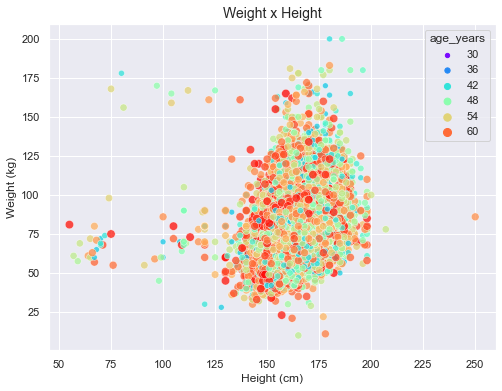

In [8]:
# sets plot size
plt.figure(figsize=(8,6))

# plots scatterplot
sns.scatterplot(x='height', y='weight', data=df_ccd_raw, hue='age_years', palette='rainbow', size='age_years', alpha=0.75)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Height", fontsize=14)

# displays the plot
plt.show()

As observed, there are outliers in the data set due to:
- weight ~90 kg and height 250 cm
- All data points below 25 kg and ages ranging from 45 to 75 years
- All data points up to 100 kg and height up to 75 cm (this might be a dwarf cluster)
- Points between 180 kg and 150 kg and height up to 125 cm

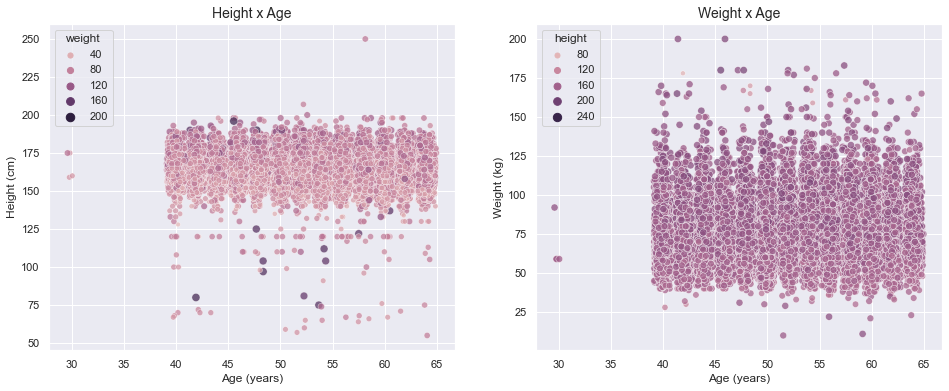

In [9]:
# sets plot size
plt.figure(figsize=(16,6))

# plots scatterplot
plt.subplot(1,2,1)
sns.scatterplot(x='age_years', y='height', data=df_ccd_raw, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.title("Height x Age", fontsize=14)

# plots scatterplot
plt.subplot(1,2,2)
sns.scatterplot(x='age_years', y='weight', data=df_ccd_raw, hue='height', size='height', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Age", fontsize=14)

# displays the plot
plt.show()

As observed, there are some outliers due to:
- Points at weight between 160 kg and 240 kg with height up to 125 cm
- Points at age between 50 and 65 with weight below 25 kg

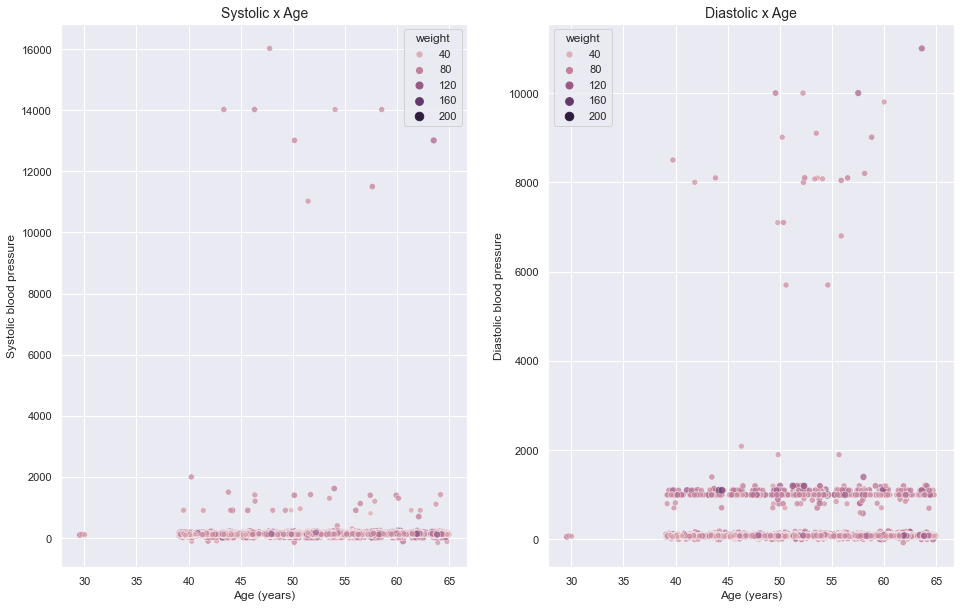

In [10]:
# sets plot size
plt.figure(figsize=(16,10))

# plots scatterplot
plt.subplot(1,2,1)
sns.scatterplot(x='age_years', y='ap_hi', data=df_ccd_raw, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Systolic blood pressure")
plt.title("Systolic x Age", fontsize=14)

plt.subplot(1,2,2)
sns.scatterplot(x='age_years', y='ap_lo', data=df_ccd_raw, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Diastolic blood pressure")
plt.title("Diastolic x Age", fontsize=14)

# displays the plot
plt.show()

As observed, there are outliers due to:
- All points above 2000 for both Systolic and Diastolic

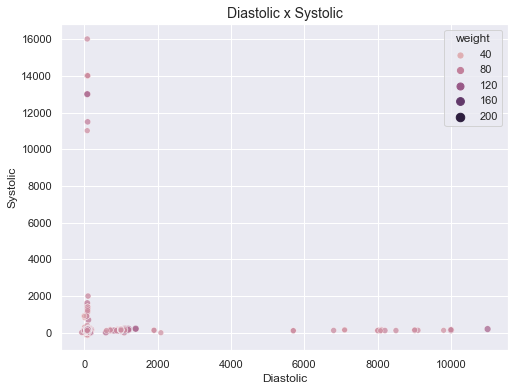

In [11]:
# sets plot size
plt.figure(figsize=(8,6))

# plots scatterplot
sns.scatterplot(x='ap_lo', y='ap_hi', data=df_ccd_raw, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Diastolic")
plt.ylabel("Systolic")
plt.title("Diastolic x Systolic", fontsize=14)

# displays the plot
plt.show()

### 2.4.3 Removing outliers

As we observed in the previous section, there are outliers in the data set. Now, we're going to get rid of them. We're going to check which values can be considered as outliers by calculating the Q1, Q3 and IQR.

In [12]:
# calculates Q1, Q3 and IQR
Q1 = np.quantile(df_ccd_raw['ap_hi'], .25)
Q3 = np.quantile(df_ccd_raw['ap_hi'], .75)
IQR = Q3 - Q1

# calculates the outliers boundaries through statistical relationship
low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR

print("Systolic boundaries for outliers")
print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlow_outliers = {low_outliers}\nhigh_outliers = {high_outliers}")


# calculates Q1, Q3 and IQR
Q1 = np.quantile(df_ccd_raw['ap_lo'], .25)
Q3 = np.quantile(df_ccd_raw['ap_lo'], .75)
IQR = Q3 - Q1

# calculates the outliers boundaries through statistical relationship
low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR

print("\nDiastolic boundaries for outliers")
print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlow_outliers = {low_outliers}\nhigh_outliers = {high_outliers}")

Systolic boundaries for outliers
Q1 = 120.0
Q3 = 140.0
IQR = 20.0
low_outliers = 90.0
high_outliers = 170.0

Diastolic boundaries for outliers
Q1 = 80.0
Q3 = 90.0
IQR = 10.0
low_outliers = 65.0
high_outliers = 105.0


As observed, **statistically** speaking we have: 

For **Systolic (`ap_hi`):**
- Low outliers are values below `90.0`
- High outliers are value above `170`

For **Diastolic (`ap_lo`):**
- Low outliers are values below `65.0`
- High outliers are value above `105`


However, we also need to consider the **medical diagnosis** and the boundaries that it defines for Systolic and Diastolic. Thus, by recaping our **diagram from [section 2.1.1](#2.1.1-Some-theory-behind-blood-pressure)** about blood pressure, we can get a better sense on the numbers that we previously   calculated applying statistical relationships. 

<img src="img/9842-blood-pressure-readings-explained-1296x1645-body.20181002181105178.jpg" width="480">

Thus, we're going to consider as outliers:

For **Systolic (`ap_hi`):**
- Low outliers are values lower or equal to `90.0`
- High outliers are value higher or equal to `210`

For **Diastolic (`ap_lo`):**
- Low outliers are values lower or equal to `65.0`
- High outliers are value higher or equal to `150`

In [13]:
# check the values that will be considered as outliers
df_ccd_raw[(df_ccd_raw['ap_hi'] >= 210) | (df_ccd_raw['ap_lo'] >= 150) 
           | (df_ccd_raw['ap_hi'] <= 90) | (df_ccd_raw['ap_lo'] <= 65)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0,47.873973
9,14,19834,1,164,68.000000,110,60,1,1,0,0,0,0,54.339726
23,33,23376,2,156,45.000000,110,60,1,1,0,0,1,0,64.043836
43,58,20556,2,159,63.000000,120,60,1,1,0,0,1,1,56.317808
50,65,18238,1,160,75.000000,100,60,1,1,0,0,0,0,49.967123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69922,99878,15334,1,165,62.000000,100,60,1,1,0,0,1,0,42.010959
69932,99897,15243,2,171,67.000000,110,60,1,1,0,0,1,0,41.761644
69937,99908,14489,1,160,53.000000,90,60,1,1,0,0,1,0,39.695890
69967,99955,21416,2,168,63.000000,140,1000,1,1,0,0,1,1,58.673973


In [14]:
# checks for people that are too small or too tall
df_ccd_raw[(df_ccd_raw['height'] < 100) | (df_ccd_raw['height'] >= 210)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
224,309,21800,2,76,55.000000,120,80,1,1,0,0,1,0,59.726027
6486,9223,21220,1,250,86.000000,140,100,3,1,0,0,1,1,58.136986
7598,10843,14661,2,70,72.000000,120,8,1,1,0,0,1,0,40.167123
8171,11662,17646,2,97,170.000000,160,100,1,1,1,0,1,1,48.345205
12770,18218,19594,1,75,168.000000,120,80,1,1,1,0,1,1,53.682192
13265,18928,22456,2,71,68.000000,120,80,3,1,0,0,1,0,61.523288
14323,20459,22005,1,67,57.000000,120,90,1,1,0,0,1,1,60.287671
15167,21686,15812,1,70,68.000000,120,80,1,1,0,0,0,0,43.320548
16699,23859,19680,2,74,98.000000,140,90,1,1,0,0,1,1,53.917808
17277,24690,17530,1,98,45.000000,12,80,1,1,0,0,1,0,48.027397


As we know that the [shortest person in 2020](https://www.dw.com/en/worlds-shortest-man-dies-aged-27/a-52047866) was 67.08 cm at age 27. We can assume that numbers below this value will be considered as outliers. 

In addition, the [tallest person in 2020](https://en.wikipedia.org/wiki/Sultan_K%C3%B6sen) is 251 cm at age 37 weighting 222 kg. Thus, we can assume that numbers above this value will be considered as outliers.

In [15]:
# checks for people that are too slim
df_ccd_raw[(df_ccd_raw['weight'] <= 40)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
2262,3187,15285,1,152,40.000000,110,60,1,1,0,0,1,0,41.876712
2472,3490,14829,1,152,40.000000,120,80,1,1,0,0,0,0,40.627397
2663,3753,20584,1,142,40.000000,135,90,2,1,0,0,1,1,56.394521
3752,5306,15400,1,120,30.000000,110,70,1,1,0,0,1,0,42.191781
5794,8226,17663,1,151,37.000000,120,80,1,1,0,0,1,0,48.391781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65082,92896,22688,1,145,33.000000,130,1000,2,1,0,0,1,1,62.158904
65650,93697,19114,1,147,38.000000,100,70,3,3,0,0,1,0,52.367123
66282,94619,22689,2,154,40.000000,110,70,1,1,1,0,1,0,62.161644
66965,95606,17355,1,140,40.000000,120,90,1,1,0,1,1,1,47.547945


In [16]:
# removes outliers: blood pressure
df_ccd_no = df_ccd_raw[~((df_ccd_raw['ap_hi'] >= 210) | (df_ccd_raw['ap_lo'] >= 150) 
           | (df_ccd_raw['ap_hi'] <= 90) | (df_ccd_raw['ap_lo'] <= 65))]

# removes outliers: height
df_ccd_no = df_ccd_no[~((df_ccd_no['height'] <= 110) | (df_ccd_no['height'] >= 210))]

# removes outliers: weight
df_ccd_no = df_ccd_no[~(df_ccd_no['weight'] <= 40)]

# checks for people that are too slim
df_ccd_no = df_ccd_no[~(df_ccd_no['age_years'] < 35)]

df_ccd_no

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1,48.282192
5,8,21914,1,151,67.000000,120,80,2,2,0,0,0,0,60.038356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.000000,120,80,1,1,1,0,1,0,52.712329
69996,99995,22601,1,158,126.000000,140,90,2,2,0,0,1,1,61.920548
69997,99996,19066,2,183,105.000000,180,90,3,1,0,1,0,1,52.235616
69998,99998,22431,1,163,72.000000,135,80,1,2,0,0,0,1,61.454795


In [17]:
ratio_of_outliers_removed = 100 - (df_ccd_no.shape[0] / df_ccd_raw.shape[0]) * 100
print(f'Ratio of removed outliers: {round(ratio_of_outliers_removed, 2)}%')

Ratio of removed outliers: 6.56%


As we removed the outliers, representing **~6.55% of the data set** which is a fair number, we can proceed with out analysis.

### 2.4.4 Checking what we've done

Let's check how the relationships changed after we removed the outliers.

In [18]:
# checks the descriptive statistics
summary_stats = gu.get_descriptive_statistics(df_ccd_no)


# classifies skwewness
summary_stats['skwewness_class'] = summary_stats['skewness'].apply(lambda x: 
                                                                   'nearly symmetric' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                                                                   else 'moderately skewed' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                                                                   else 'highly skewed')

# classifies kurtosis
summary_stats['kurtosis_class'] = summary_stats['kurtosis'].apply(lambda x:
                                                                 'heavy tails' if (x > 0) 
                                                                 else 'light tails')

# checks operations
summary_stats

,attributes,min,max,range,mean,median,std,skewness,kurtosis,skwewness_class,kurtosis_class
0,id,0.000000,"99,999.000000","99,999.000000","49,958.496415","49,981.000000","28,850.227044",-0.001258,-1.198137,nearly symmetric,light tails
1,age,"14,275.000000","23,713.000000","9,438.000000","19,508.021740","19,724.000000","2,453.928509",-0.320684,-0.806487,nearly symmetric,light tails
2,gender,1.000000,2.000000,1.000000,1.354110,1.000000,0.478243,0.610121,-1.627802,moderately skewed,light tails
3,height,111.000000,207.000000,96.000000,164.522879,165.000000,7.907502,0.005043,0.715586,nearly symmetric,heavy tails
4,weight,41.000000,200.000000,159.000000,74.508770,72.000000,14.224910,1.033639,2.497163,highly skewed,heavy tails
5,ap_hi,95.000000,202.000000,107.000000,127.674540,120.000000,15.765263,1.079309,1.406964,highly skewed,heavy tails
6,ap_lo,66.000000,140.000000,74.000000,82.271308,80.000000,8.362246,0.852239,1.710873,moderately skewed,heavy tails
7,cholesterol,1.000000,3.000000,2.000000,1.370561,1.000000,0.684540,1.573731,0.938792,highly skewed,heavy tails
8,gluc,1.000000,3.000000,2.000000,1.228623,1.000000,0.575416,2.382069,4.209014,highly skewed,heavy tails
9,smoke,0.000000,1.000000,1.000000,0.088443,0.000000,0.283939,2.898977,6.404261,highly skewed,heavy tails


As we can observe, some features, such as, `height` and `ap_lo`  that were `moderately skewed` or `highly skewed` now are less skewed (`nearly symmetric` or `moderately skewed`).

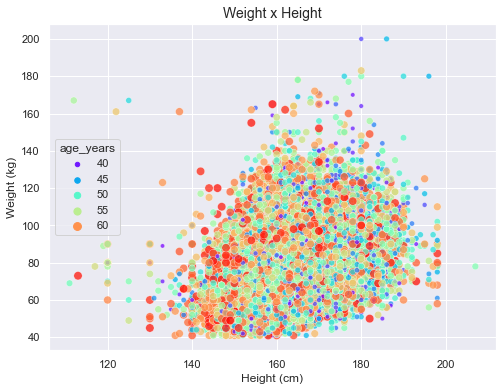

In [19]:
# sets plot size
plt.figure(figsize=(8,6))

# plots scatterplot
sns.scatterplot(x='height', y='weight', data=df_ccd_no, hue='age_years', palette='rainbow', size='age_years', alpha=0.75)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Height", fontsize=14)

# displays the plot
plt.show()

As observed, by removing the outliers, we could zoom in the data and check the values in deeper details.

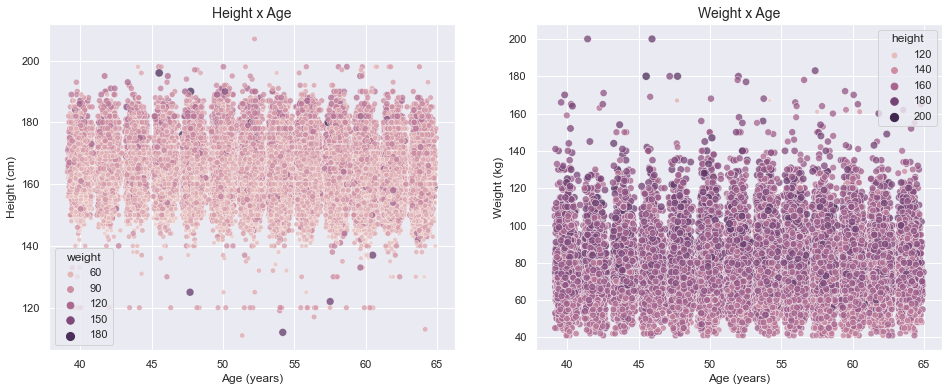

In [20]:
# sets plot size
plt.figure(figsize=(16,6))

# plots scatterplot
plt.subplot(1,2,1)
sns.scatterplot(x='age_years', y='height', data=df_ccd_no, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.title("Height x Age", fontsize=14)

# plots scatterplot
plt.subplot(1,2,2)
sns.scatterplot(x='age_years', y='weight', data=df_ccd_no, hue='height', size='height', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Age", fontsize=14)

# displays the plot
plt.show()

As observed, by removing the outliers, we could zoom in the data and check the values in deeper details.

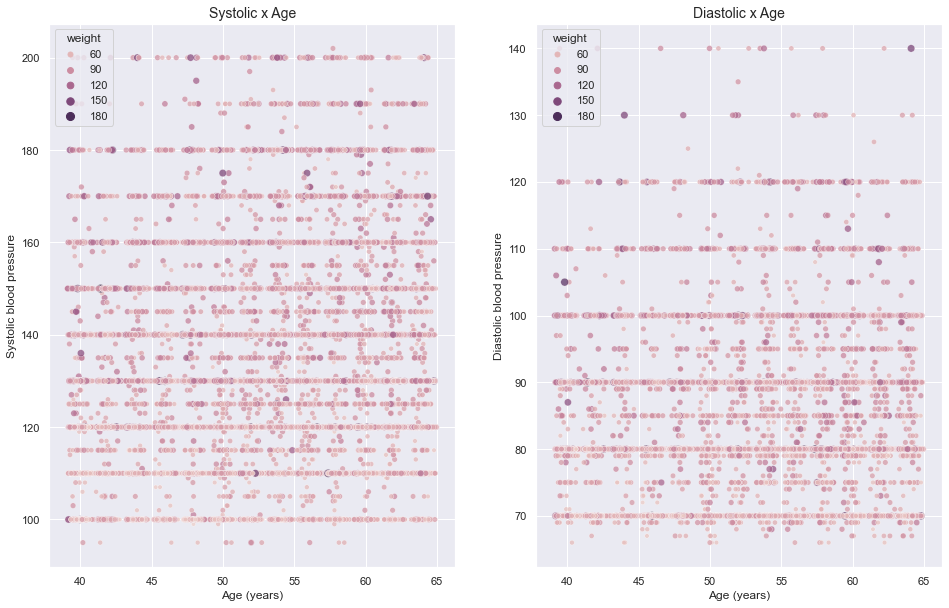

In [21]:
# sets plot size
plt.figure(figsize=(16,10))

# plots scatterplot
plt.subplot(1,2,1)
sns.scatterplot(x='age_years', y='ap_hi', data=df_ccd_no, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Systolic blood pressure")
plt.title("Systolic x Age", fontsize=14)

plt.subplot(1,2,2)
sns.scatterplot(x='age_years', y='ap_lo', data=df_ccd_no, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Diastolic blood pressure")
plt.title("Diastolic x Age", fontsize=14)

# displays the plot
plt.show()

As observed, by removing the outliers, we could zoom in the data and check the values in deeper details. Now the points distribution are more clear.

## 2.5 Checking missing data

In [22]:
# checks for missing data
df_ccd_no.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

As observed, there is no missing data.

In [23]:
# copies the data set
df_ccd_clean = df_ccd_no.copy()

## 2.6 Checkpoint

In [24]:
# saves the data set state
df_ccd_clean.to_csv('data/ccd_clean.csv', index=False)

# checks data set dimension
df_ccd_clean.shape

(65409, 14)

# 3.0 Outlining the hypotheses

## 3.1 Hypotheses mindmap

![](img/hypotheses-map.jpg)

## 3.2 Creating hypotheses

### 3.2.1 Person Age

1. There are less cases of heart diseases among young people (up to 30s).

### 3.2.2 Person Height

1. The cases of heart diseases does not significantly depend on the height.

### 3.2.3 Person Weight

1. The higher the weight, the higher is the cases of heart diseases.

### 3.2.4 Person Gender

1. The cases of heart diseases does not significantly depend on the gender.

### 3.2.5 Cholesterol

1. There are more cases of heart diseases for people presenting well above normal levels of cholesterol.

### 3.2.6 Glucose

1. There are more cases of heart diseases for people presenting well above normal levels of glucose.

### 3.2.7 Smoking

1. The are more cases of heart diseases for people who smokes than for people who does not.

### 3.2.8 Alcohol intake

1. The are more cases of heart diseases for people who intakes alcohol than for people who does not.

### 3.2.9 Physical activity

1. The are more cases of heart diseases for people who does not do any physical activity than for people who does.

### 3.2.10 Systolic

1. How are the cases of heart diseases distributed among systolic blood pressures?

### 3.2.11 Diastolic

1. How are the cases of heart diseases distributed among diastolic blood pressures?

# 4.0 Exploratory data analysis

## 4.1 Loading data set

In [25]:
# loads the data set
df_ccd = pd.read_csv('data/ccd_clean.csv', low_memory=False)

# checks data set dimension
df_ccd.shape

(65409, 14)

## 4.2 Univariate analysis

### 4.2.1 Target variable

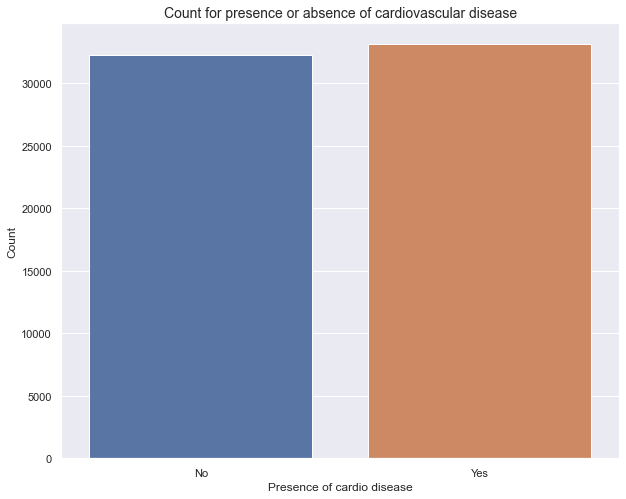

In [26]:
# sets the plot size
plt.figure(figsize=(10,8))

# counts each class for the target var
_ = sns.countplot(x=df_ccd['cardio'])

# sets plot features
plt.title("Count for presence or absence of cardiovascular disease", fontsize=14)
plt.xlabel("Presence of cardio disease")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No','Yes'])

# displays the plot
plt.show()

As observed, the classes are balanced. We have almost equal number of cases for each class.

### 4.2.2 Numerical variables

Because we have measurements, we'll consider the following variables as numerical:
- `age`
- `height`
- `weight`
- `ap_hi`
- `ap_lo`

In [27]:
# gets the numerical vars
numerical_vars = df_ccd[['age_years','height','weight','ap_hi','ap_lo']]

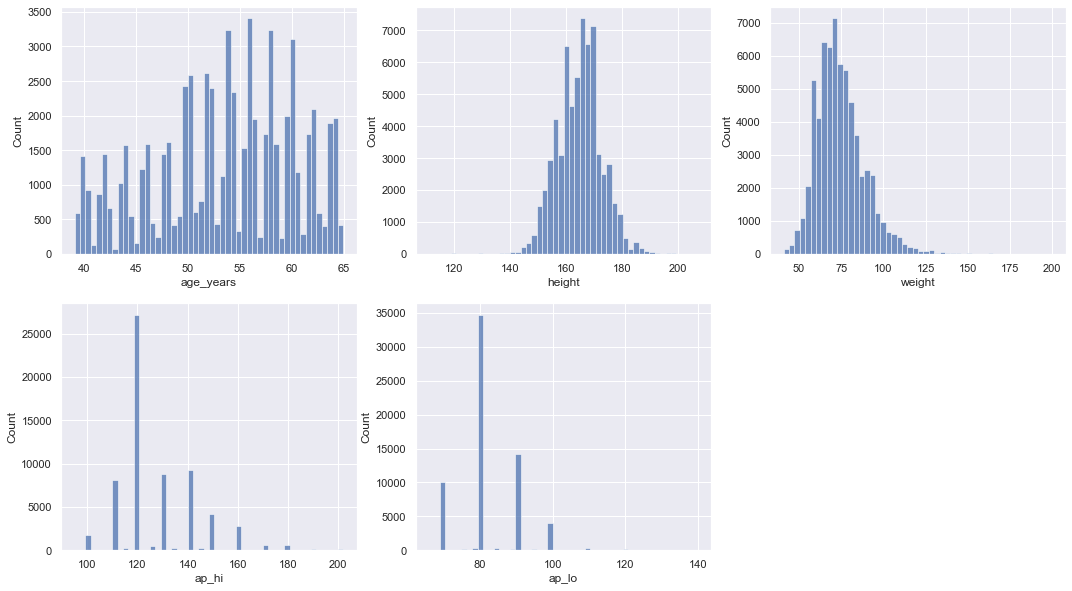

In [28]:
# sets plot size
plt.figure(figsize=(18, 10))

# sets the inital plot position
n = 1

# iterates over the columns to plot
for column in numerical_vars.columns:
    plt.subplot(2, 3, n)
    _ = sns.histplot(x=numerical_vars[column], bins=50)
    n += 1

# display the plot
plt.show()

As observed, most examined pacients:
- Have ages between 50 and 60 years old.
- Are 160 cm to 170 cm tall.
- Weight between 60 kg to 80 kg.
- Presents a blood pressure of 120 for diastolic and 80 for sistolic which means elevated to high blood pressure.

### 4.2.3 Categorical variables

Because we don't have measurements, we'll consider the following variables as categorical:

- `gender`
- `cholesterol`
- `gluc`
- `smoke`
- `alco`
- `active`

In [29]:
# gets the categorical vars
categorical_vars = df_ccd[['gender','cholesterol','gluc','smoke','alco','active']]
categorical_vars.head()

,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
4,1,2,2,0,0,0


In [30]:
# converts gender to categorical dtype
categorical_vars['gender'] = categorical_vars['gender'].astype('category')

# sets string categories for glucose
categorical_vars['gluc'] = categorical_vars['gluc'].apply(lambda x: 'normal' if x == 1 
                                                                else 'above normal' if x == 2 
                                                                else 'well above normal')
# converts glucose to categorical dtype
categorical_vars['gluc'] = categorical_vars['gluc'].astype('category')

# sets string categories for cholesterol
categorical_vars['cholesterol'] = categorical_vars['cholesterol'].apply(lambda x: 'normal' if x == 1 
                                                                        else 'above normal' if x == 2 
                                                                        else 'well above normal')

# converts cholesterol to categorical dtype
categorical_vars['cholesterol'] = categorical_vars['cholesterol'].astype('category')

# sets string categories for smoke
categorical_vars['smoke'] = categorical_vars['smoke'].apply(lambda x: 'yes' if x == 1 else 'no')

# converts smoke to categorical dtype
categorical_vars['smoke'] = categorical_vars['smoke'].astype('category')

# sets string categories for alcohol intake
categorical_vars['alco'] = categorical_vars['alco'].apply(lambda x: 'yes' if x == 1 else 'no')

# converts alcohol intake to categorical dtype
categorical_vars['alco'] = categorical_vars['alco'].astype('category')

# sets string categories for active
categorical_vars['active'] = categorical_vars['active'].apply(lambda x: 'yes' if x == 1 else 'no')

# converts active to categorical dtype
categorical_vars['active'] = categorical_vars['active'].astype('category')


<ipython-input-30-d98845746b40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars['gender'] = categorical_vars['gender'].astype('category')
<ipython-input-30-d98845746b40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars['gluc'] = categorical_vars['gluc'].apply(lambda x: 'normal' if x == 1
<ipython-input-30-d98845746b40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

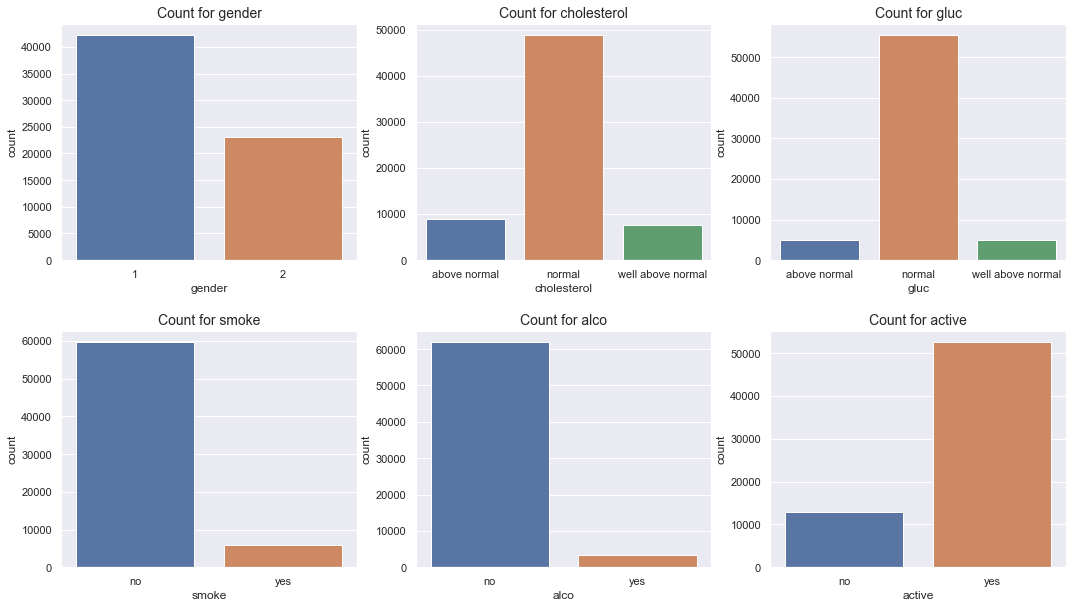

In [31]:
# sets plot size
plt.figure(figsize=(18, 10))

# sets the inital plot position
n = 1

# iterates over the columns to plot
for column in categorical_vars.columns:
    plt.subplot(2, 3, n)
    _ = sns.countplot(x=categorical_vars[column])
    plt.title("Count for " + column, fontsize=14)
    n += 1

# adjust height reserved for space between subplots  
plt.subplots_adjust(hspace=0.3)

# display the plot
plt.show()

Key points:
- There many more people presenting **normal levels** for both `cholesterol` and `glucose`.
- The great majority of people **don't smoke neither intakes alcohol**.
- The majority of people **are physically active**.

## 4.3 Bivariate analysis - Hypotheses validation

In this section, we're going to validate the hypotheses that we outlined in section 3.

In [32]:
# rounds the ages for easier EDA
df_ccd['age_years'] = round(df_ccd['age_years'], ndigits=0).astype(int)

### H1. There are less cases of heart diseases among young people (up to 30s). <font color="green">(TRUE)</font>

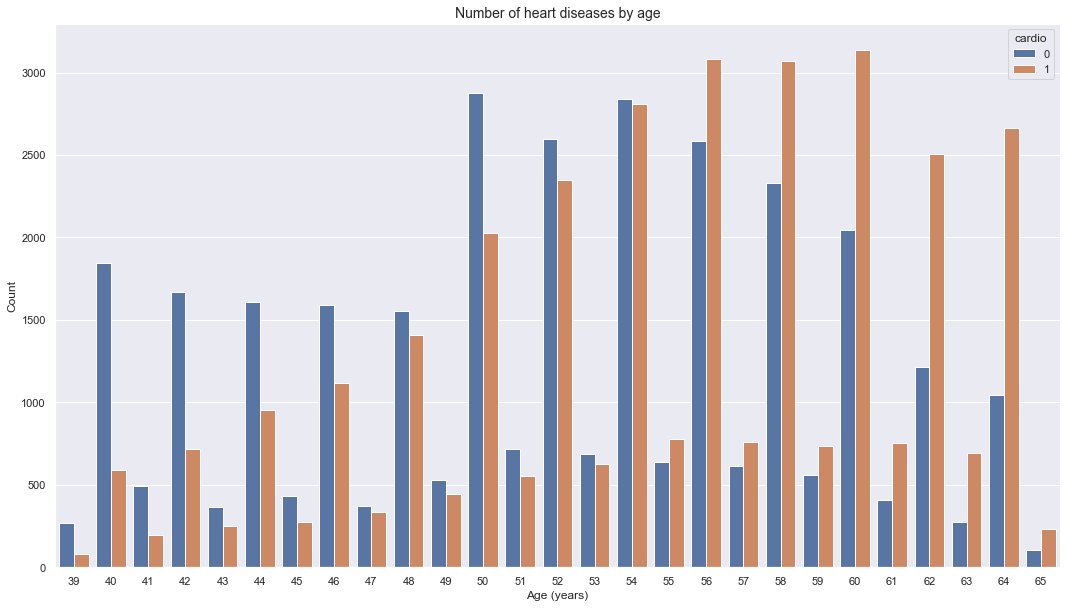

In [33]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='age_years', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by age", fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("Count")

# display plot
plt.show()

As observed, there are no cases of heart diseases for people under 30s.

> Thus, the hypothesis is **TRUE**.

### H2. The cases of heart diseases does not significantly depend on the height. <font color="red">(FALSE)</font>

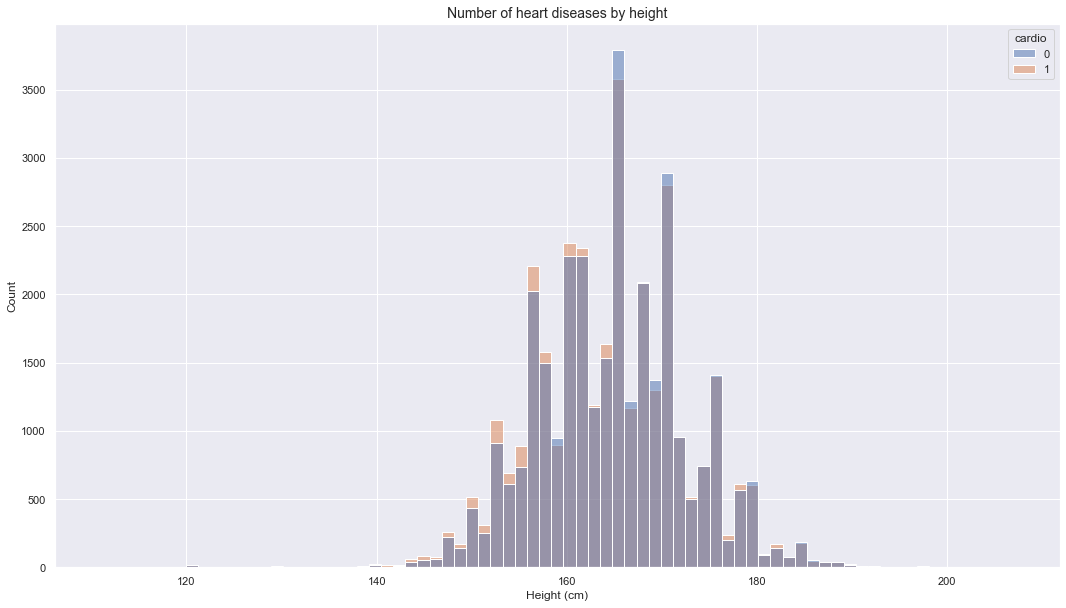

In [34]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.histplot(x='height', hue='cardio', data=df_ccd, bins=75)

# sets plot features
plt.title("Number of heart diseases by height", fontsize=14)
plt.xlabel("Height (cm)")
plt.ylabel("Count")

# display plot
plt.show()

As observed, up to ~165 cm there are significantly more cases of heart diseases. Then, above this height, there are fewer cases.

> Thus, the hypothesis is **FALSE**.

### H3. The higher the weight, the higher is the cases of heart diseases. <font color="green">(TRUE)</font>

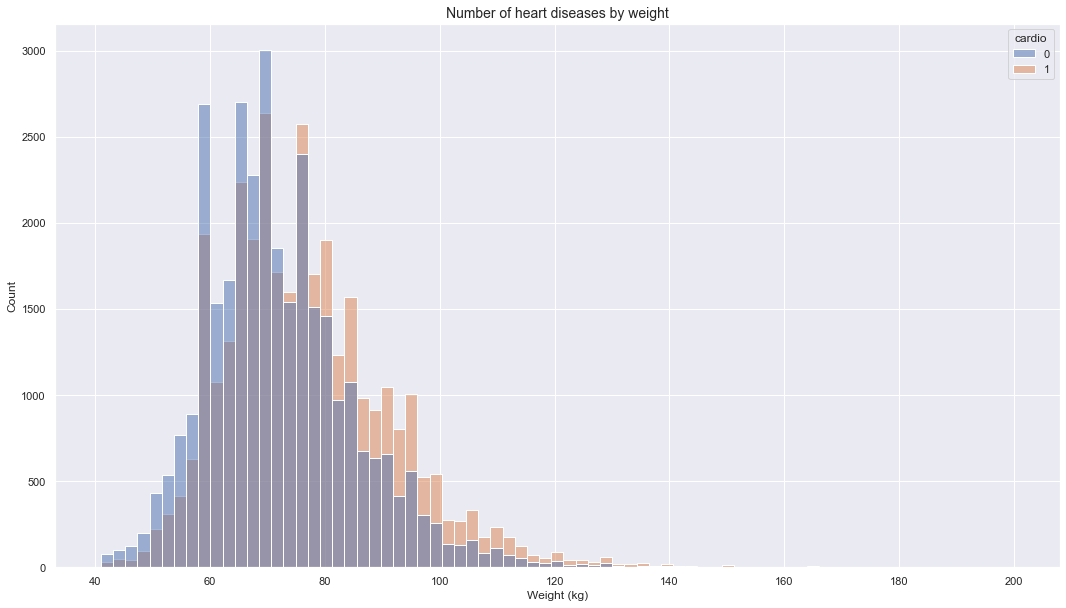

In [35]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.histplot(x='weight', hue='cardio', data=df_ccd, bins=75)

# sets plot features
plt.title("Number of heart diseases by weight", fontsize=14)
plt.xlabel("Weight (kg)")
plt.ylabel("Count")

# display plot
plt.show()

As observed, there a higher number of cases of heart disease for weights above ~75 kg.

> Thus, the hypothesis is **FALSE**.

### H4. The cases of heart diseases does not significantly depend on the gender. <font color="red">(FALSE)</font>

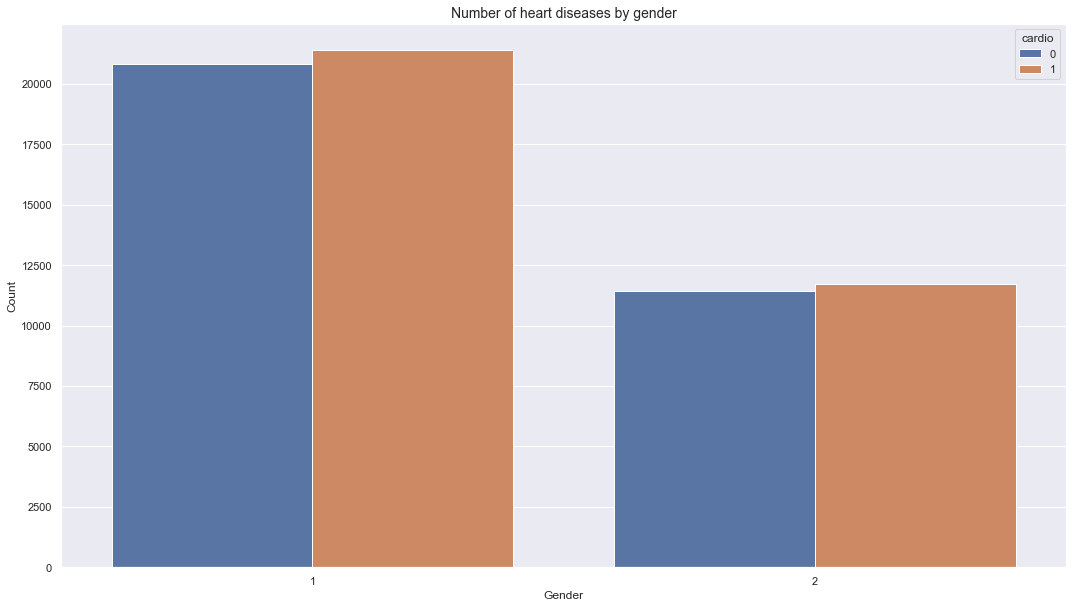

In [36]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='gender', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")

# display plot
plt.show()

As observed, there are different number of cases of heart disease for each gender. This could be due the proportion of the sample.

> Thus, the hypothesis is **FALSE**

### H5. There are more cases of heart diseases for people presenting well above normal levels of cholesterol. <font color="green">(TRUE)</font>

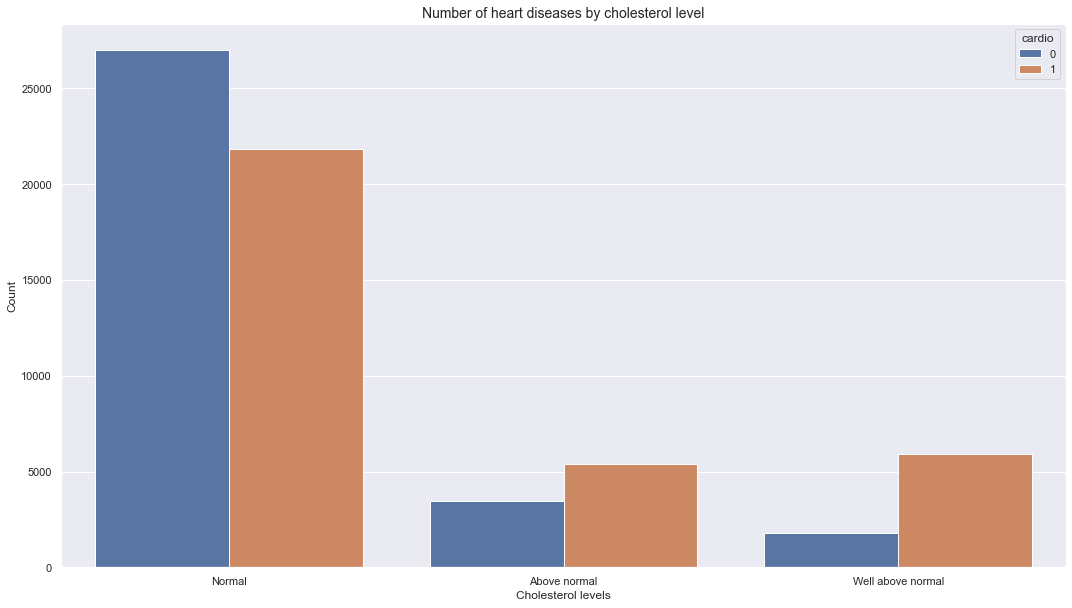

In [37]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='cholesterol', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by cholesterol level", fontsize=14)
plt.xlabel("Cholesterol levels")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2], labels=['Normal','Above normal','Well above normal'])

# display plot
plt.show()

As observed, proportionally, there are many more cases for people presenting higher levels of cholesterol.

> Thus, the hypothesis is **TRUE**.

### H6. There are more cases of heart diseases for people presenting well above normal levels of glucose. <font color="green">(TRUE)</font>

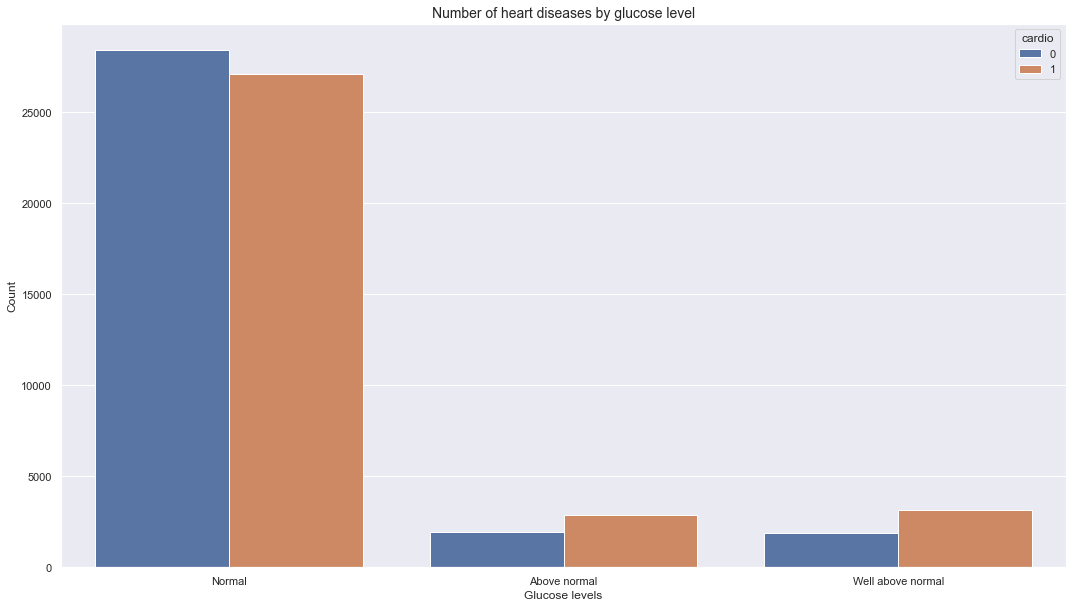

In [38]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='gluc', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by glucose level", fontsize=14)
plt.xlabel("Glucose levels")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2], labels=['Normal','Above normal','Well above normal'])

# display plot
plt.show()

As observed, proportionally, there are many more cases for people presenting higher levels of glucose.

> Thus, the hypothesis is **TRUE**.

### H7. The are more cases of heart diseases for people who smokes than for people who does not. <font color="red">(FALSE)</font>

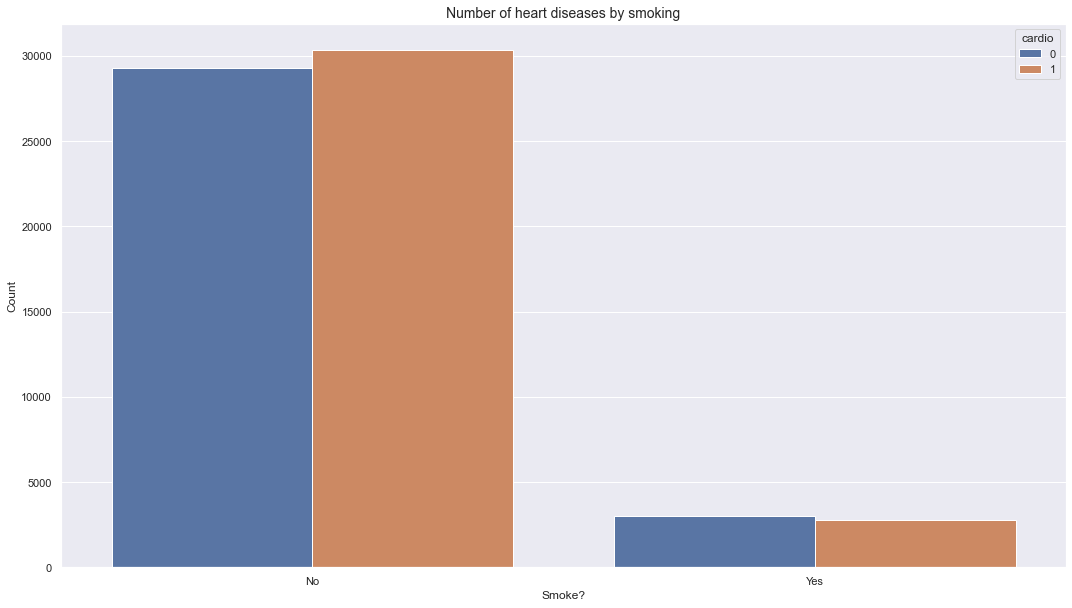

In [39]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='smoke', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by smoking", fontsize=14)
plt.xlabel("Smoke?")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])

# display plot
plt.show()

As observed, the great majority of cases are among people who doesn't smoke.

> Thus, the hypothesis is **FALSE**.

### H8. The are more cases of heart diseases for people who intakes alcohol than for people who does not. <font color="red">(FALSE)</font>

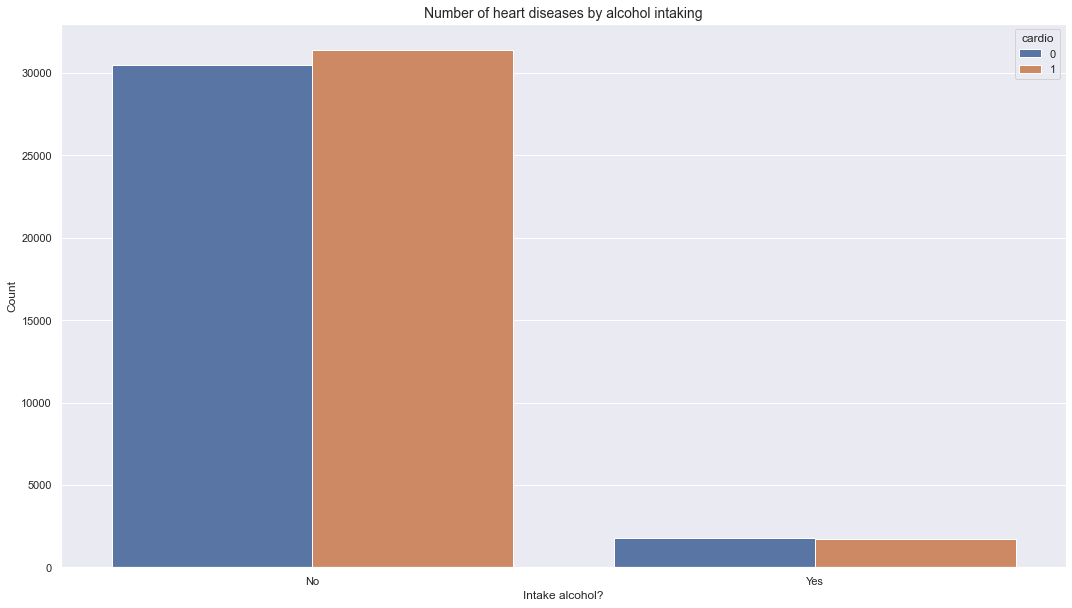

In [40]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='alco', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by alcohol intaking", fontsize=14)
plt.xlabel("Intake alcohol?")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])

# display plot
plt.show()

As observed, the great majority of cases are among people who doesn't intake alcohol.

> Thus, the hypothesis is **FALSE**.

### H9. The are more cases of heart diseases for people who does not do any physical activity than for people who does. <font color="green">(TRUE)</font>

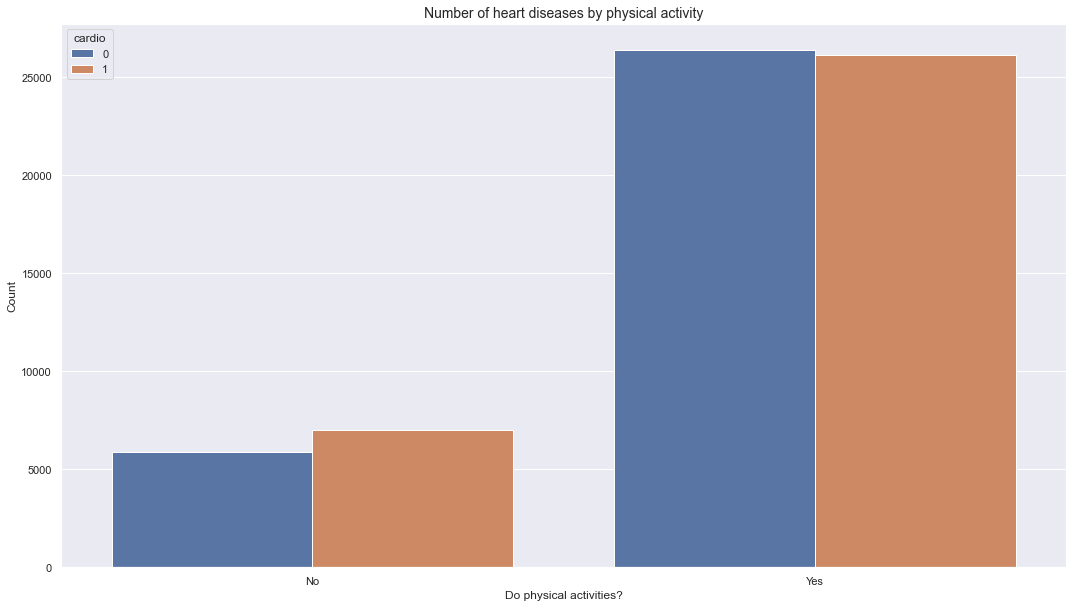

In [41]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.countplot(x='active', hue='cardio', data=df_ccd)

# sets plot features
plt.title("Number of heart diseases by physical activity", fontsize=14)
plt.xlabel("Do physical activities?")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])

# display plot
plt.show()

As observed, people who don't do any physical activity presents more cases of heart diseases.

> Thus, ths hypothesis is **TRUE**.

### H10. How are the cases of heart diseases distributed among systolic blood pressures?

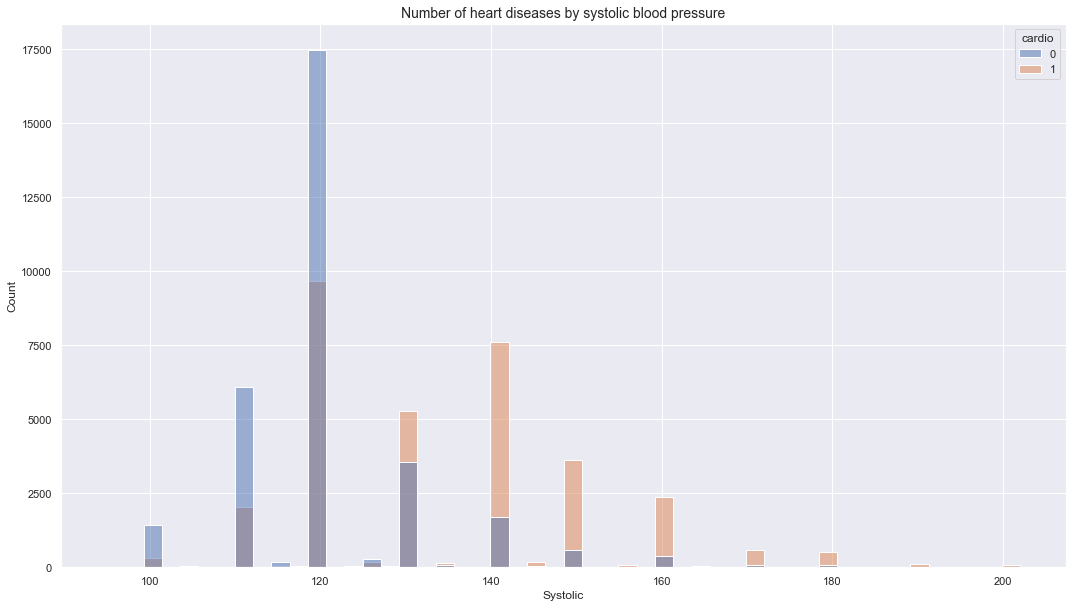

In [42]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.histplot(x='ap_hi', hue='cardio', data=df_ccd, bins=50)

# sets plot features
plt.title("Number of heart diseases by systolic blood pressure", fontsize=14)
plt.xlabel("Systolic")
plt.ylabel("Count")

# display plot
plt.show()

As observed, there are more cases for people that presents high blood pressure.

### H11. How are the cases of heart diseases distributed among diastolic blood pressures?

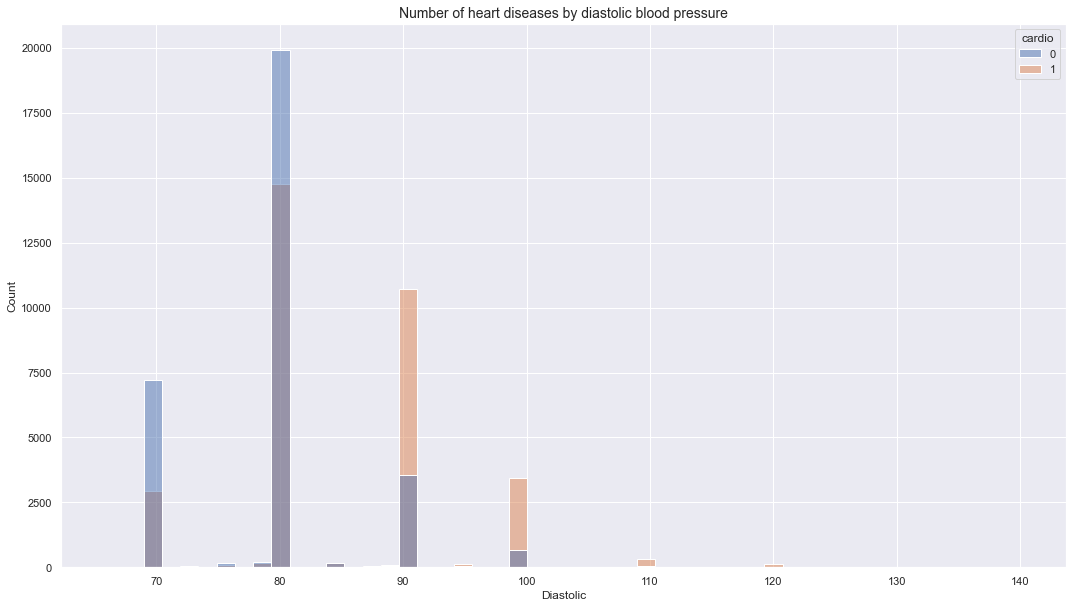

In [43]:
# sets plot size
plt.figure(figsize=(18,10))

# plots countplot
_ = sns.histplot(x='ap_lo', hue='cardio', data=df_ccd, bins=50)

# sets plot features
plt.title("Number of heart diseases by diastolic blood pressure", fontsize=14)
plt.xlabel("Diastolic")
plt.ylabel("Count")

# display plot
plt.show()

As observed, there are more cases for people that presents high blood pressure.

### 4.3.1 Hypotheses summary

| ID  | Description                                                                                                    | Conclusion                                                                     |
|-----|----------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| H1  | There are less cases of heart diseases among young people \(up to 30s\)                                        | TRUE                                                                           |
| H2  | The cases of heart diseases does not significantly depend on the height                                        | FALSE                                                                          |
| H3  | The higher the weight, the higher is the cases of heart diseases                                               | TRUE                                                                           |
| H4  | The cases of heart diseases does not significantly depend on the gender                                        | FALSE                                                                          |
| H5  | There are more cases of heart diseases for people presenting well above normal levels of cholesterol           | TRUE                                                                           |
| H6  | There are more cases of heart diseases for people presenting well above normal levels of glucose               | TRUE                                                                           |
| H7  | The are more cases of heart diseases for people who smokes than for people who does not                        | FALSE                                                                          |
| H8  | The are more cases of heart diseases for people who intakes alcohol than for people who does not               | FALSE                                                                          |
| H9  | The are more cases of heart diseases for people who does not do any physical activity than for people who does | TRUE                                                                           |
| H10 | How are the cases of heart diseases distributed among systolic blood pressures?                                | As observed, there are more cases for people that presents high blood pressure |
| H11 | How are the cases of heart diseases distributed among diastolic blood pressures                                | As observed, there are more cases for people that presents high blood pressure |


## 4.4 Multivariate analysis - Correlations

### 4.4.1 Separating and transforming dtpyes

Although in the previous sections we considered some numerical and other categorical vars, actually we only have numerical vars.

In addition, we're going to drop the `age_years` column because we're not going to use it anymore. 

We're are also going to drop the `id` columns, since it does not give any useful information.

In [44]:
# drops unuseful cols
df_ccd.drop(['id','age_years'], axis=1, inplace=True)
df_ccd.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.000000,110,80,1,1,0,0,1,0
1,20228,1,156,85.000000,140,90,3,1,0,0,1,1
2,18857,1,165,64.000000,130,70,3,1,0,0,0,1
3,17623,2,169,82.000000,150,100,1,1,0,0,1,1
4,21914,1,151,67.000000,120,80,2,2,0,0,0,0


We'll consider to be numerical:
- `age`
- `height`
- `weight`
- `ap_hi`
- `ap_lo`

We'll consider to be categorical:
- `gender`
- `cholesterol`
- `gluc`

We'll consider to be binary:
- `smoke`
- `alco`
- `active`

Target: `cardio`

In [45]:
# gets only the numerical attributes
numerical_vars = df_ccd[['age','height','weight','ap_hi','ap_lo']]

# gets only the categorical attributes
categorical_vars = df_ccd[['gender','cholesterol','gluc']]

# gets only the binary attributes
binary_vars = df_ccd[['smoke','alco','active']]

We'll apply some dtypes transformations, so it'll be easier to make the correlations.

In [46]:
# sets string categories for gender
categorical_vars['gender'] = categorical_vars['gender'].apply(lambda x: 'A' if x == 1 else 'B')

# converts gender to categorical dtype
categorical_vars['gender'] = categorical_vars['gender'].astype('category')

# sets string categories for glucose
categorical_vars['gluc'] = categorical_vars['gluc'].apply(lambda x: 'normal' if x == 1 
                                                                else 'above normal' if x == 2 
                                                                else 'well above normal')
# converts glucose to categorical dtype
categorical_vars['gluc'] = categorical_vars['gluc'].astype('category')

# sets string categories for cholesterol
categorical_vars['cholesterol'] = categorical_vars['cholesterol'].apply(lambda x: 'normal' if x == 1 
                                                                        else 'above normal' if x == 2 
                                                                        else 'well above normal')

# converts cholesterol to categorical dtype
categorical_vars['cholesterol'] = categorical_vars['cholesterol'].astype('category')

<ipython-input-46-745549d3d2ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars['gender'] = categorical_vars['gender'].apply(lambda x: 'A' if x == 1 else 'B')
<ipython-input-46-745549d3d2ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars['gender'] = categorical_vars['gender'].astype('category')
<ipython-input-46-745549d3d2ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### 4.4.2 Correlation between numerical attributes (explanatory vars)

In [47]:
# checks numerical info
numerical_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65409 entries, 0 to 65408
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     65409 non-null  int64  
 1   height  65409 non-null  int64  
 2   weight  65409 non-null  float64
 3   ap_hi   65409 non-null  int64  
 4   ap_lo   65409 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.5 MB


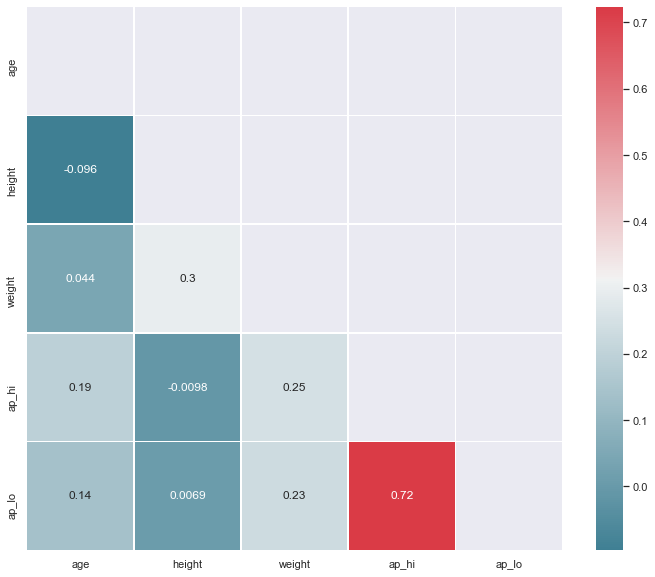

In [48]:
# calcultes the correlations
correlations = numerical_vars.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(12, 10)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlations, cmap=cmap, mask=mask, linewidths=.5, annot=True)

# displays the plot
plt.show()

Key points:
- `ap_hi` and `ap_lo` present high positive correlation (`0.72`).

### 4.4.3 Correlation between binary and numerical attributes (explanatory vars)

In [49]:
from scipy.stats import pointbiserialr

In [50]:
# checks binary info
binary_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65409 entries, 0 to 65408
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   smoke   65409 non-null  int64
 1   alco    65409 non-null  int64
 2   active  65409 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [51]:
# displays the numerical vars
numerical_vars.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')

In [52]:
# makes all the possible combinations between attributes
a1 = pointbiserialr(binary_vars['smoke'], numerical_vars['age'])[0]
a2 = pointbiserialr(binary_vars['smoke'], numerical_vars['height'])[0]
a3 = pointbiserialr(binary_vars['smoke'], numerical_vars['weight'])[0]
a4 = pointbiserialr(binary_vars['smoke'], numerical_vars['ap_hi'])[0]
a5 = pointbiserialr(binary_vars['smoke'], numerical_vars['ap_lo'])[0]

a6 = pointbiserialr(binary_vars['alco'], numerical_vars['age'])[0]
a7 = pointbiserialr(binary_vars['alco'], numerical_vars['height'])[0]
a8 = pointbiserialr(binary_vars['alco'], numerical_vars['weight'])[0]
a9 = pointbiserialr(binary_vars['alco'], numerical_vars['ap_hi'])[0]
a10 = pointbiserialr(binary_vars['alco'], numerical_vars['ap_lo'])[0]

a11 = pointbiserialr(binary_vars['active'], numerical_vars['age'])[0]
a12 = pointbiserialr(binary_vars['active'], numerical_vars['height'])[0]
a13 = pointbiserialr(binary_vars['active'], numerical_vars['weight'])[0]
a14 = pointbiserialr(binary_vars['active'], numerical_vars['ap_hi'])[0]
a15 = pointbiserialr(binary_vars['active'], numerical_vars['ap_lo'])[0]

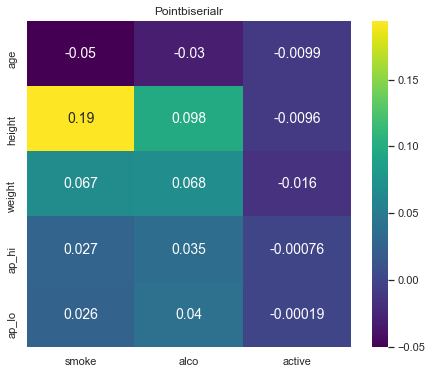

In [53]:
# creates a DataFrame to store the values
df_pbs_r = pd.DataFrame({'smoke':[a1, a2, a3, a4, a5],
                         'alco':[a6, a7, a8, a9, a10],
                         'active':[a11, a12, a13, a14, a15]})

# sets the index equal to columns
df_pbs_r = df_pbs_r.set_index(numerical_vars.columns)


# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(16, 6)

# plots the heatmap
plt.subplot(1,2,1)
sns.heatmap(df_pbs_r, annot=True, annot_kws={"fontsize":14}, cmap='viridis')
plt.title("Pointbiserialr")

# displays plot
plt.show()

As observed, we have:
- `smoke` and `age`: very strong positive correlation
- `smoke` and `ap_hi`: weak positive correlation
- `alco` and ap_hi: very strong positive correlation
- `alco` and `weight`: strong positive correlation
- `alco` and `height`: moderate positive correlation
- `alco` and `age`: moderate positive correlation
- Very weak negative correaltion with `active`.

### 4.4.4 Correlations between categorical attributes (explanatory vars)

In [54]:
# checks categorical info
categorical_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65409 entries, 0 to 65408
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gender       65409 non-null  category
 1   cholesterol  65409 non-null  category
 2   gluc         65409 non-null  category
dtypes: category(3)
memory usage: 192.0 KB


#### Using Cramér V

In [55]:
# makes all the possible combinations between categorical attributes
a1 = gu.cramer_v(categorical_vars['gender'], categorical_vars['gender'])
a2 = gu.cramer_v(categorical_vars['gender'], categorical_vars['cholesterol'])
a3 = gu.cramer_v(categorical_vars['gender'], categorical_vars['gluc'])

a4 = gu.cramer_v(categorical_vars['cholesterol'], categorical_vars['gender'])
a5 = gu.cramer_v(categorical_vars['cholesterol'], categorical_vars['cholesterol'])
a6 = gu.cramer_v(categorical_vars['cholesterol'], categorical_vars['gluc'])

a7 = gu.cramer_v(categorical_vars['gluc'], categorical_vars['gender'])
a8 = gu.cramer_v(categorical_vars['gluc'], categorical_vars['cholesterol'])
a9 = gu.cramer_v(categorical_vars['gluc'], categorical_vars['gluc'])

# creates a DataFrame to store the correlations values
df_cramer_v = pd.DataFrame({'gender': [a1, a2, a3],
                            'cholesterol':[a4, a5, a6],
                            'gluc':[a7, a8, a9],})

# sets the index equal to columns
df_cramer_v = df_cramer_v.set_index(df_cramer_v.columns)
df_cramer_v

,gender,cholesterol,gluc
gender,0.999974,0.040263,0.024127
cholesterol,0.040263,1.000015,0.393204
gluc,0.024127,0.393204,1.000015


#### Using Theil's U

In [56]:
# makes all the possible combinations between categorical attributes
a1 = gu.theils_u(categorical_vars['gender'], categorical_vars['gender'])
a2 = gu.theils_u(categorical_vars['gender'], categorical_vars['cholesterol'])
a3 = gu.theils_u(categorical_vars['gender'], categorical_vars['gluc'])

a4 = gu.theils_u(categorical_vars['cholesterol'], categorical_vars['gender'])
a5 = gu.theils_u(categorical_vars['cholesterol'], categorical_vars['cholesterol'])
a6 = gu.theils_u(categorical_vars['cholesterol'], categorical_vars['gluc'])

a7 = gu.theils_u(categorical_vars['gluc'], categorical_vars['gender'])
a8 = gu.theils_u(categorical_vars['gluc'], categorical_vars['cholesterol'])
a9 = gu.theils_u(categorical_vars['gluc'], categorical_vars['gluc'])

# creates a DataFrame to store the correlations values
df_theils_u = pd.DataFrame({'gender': [a1, a2, a3],
                            'cholesterol':[a4, a5, a6],
                            'gluc':[a7, a8, a9],})

# sets the index equal to columns
df_theils_u = df_theils_u.set_index(df_theils_u.columns)
df_theils_u

,gender,cholesterol,gluc
gender,1.000000,0.327023,0.518147
cholesterol,0.063500,1.000000,0.608892
gluc,0.062741,0.417290,1.000000


#### Analyzing the correlation methods

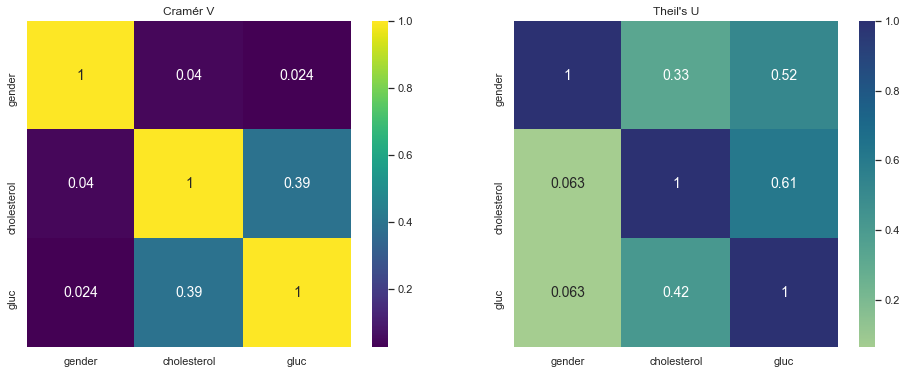

In [57]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(16, 6)

# plots the heatmap
plt.subplot(1,2,1)
sns.heatmap(df_cramer_v, annot=True, annot_kws={"fontsize":14}, cmap='viridis')
plt.title("Cramér V")

# plots the heatmap
plt.subplot(1,2,2)
sns.heatmap(df_theils_u, annot=True, annot_kws={"fontsize":14}, cmap='crest')
plt.title("Theil's U")

# displays plot
plt.show()

# 5.0 Data preprocessing

## 5.1 Loading data set

In [58]:
# loads the data set
df_ccd = pd.read_csv('data/ccd_clean.csv', low_memory=False)

# drops unuseful cols
df_ccd.drop(['id','age_years'], axis=1, inplace=True)

# checks data set dimension
df_ccd.shape

(65409, 12)

## 5.3 Feature engineering

In [59]:
# calculates the height in squared meters
height_squared_meters = (np.multiply(df_ccd['height'], df_ccd['height']))/10000

# calculates BMI
df_ccd['bmi'] = np.divide(df_ccd['weight'], height_squared_meters)

In [60]:
# sets string categories for gender
df_ccd['gender'] = df_ccd['gender'].apply(lambda x: 'A' if x == 1 else 'B')

# converts gender to categorical dtype
df_ccd['gender'] = df_ccd['gender'].astype('category')

# sets string categories for glucose
df_ccd['gluc'] = df_ccd['gluc'].apply(lambda x: 'normal' if x == 1 
                                                        else 'above normal' if x == 2 
                                                        else 'well above normal')
# converts glucose to categorical dtype
df_ccd['gluc'] = df_ccd['gluc'].astype('category')

# sets string categories for cholesterol
df_ccd['cholesterol'] = df_ccd['cholesterol'].apply(lambda x: 'normal' if x == 1 
                                                                        else 'above normal' if x == 2 
                                                                        else 'well above normal')

# converts cholesterol to categorical dtype
df_ccd['cholesterol'] = df_ccd['cholesterol'].astype('category')

In [61]:
df_ccd

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,B,168,62.000000,110,80,normal,normal,0,0,1,0,21.967120
1,20228,A,156,85.000000,140,90,well above normal,normal,0,0,1,1,34.927679
2,18857,A,165,64.000000,130,70,well above normal,normal,0,0,0,1,23.507805
3,17623,B,169,82.000000,150,100,normal,normal,0,0,1,1,28.710479
4,21914,A,151,67.000000,120,80,above normal,above normal,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65404,19240,B,168,76.000000,120,80,normal,normal,1,0,1,0,26.927438
65405,22601,A,158,126.000000,140,90,above normal,above normal,0,0,1,1,50.472681
65406,19066,B,183,105.000000,180,90,well above normal,normal,0,1,0,1,31.353579
65407,22431,A,163,72.000000,135,80,normal,above normal,0,0,0,1,27.099251


## 5.4 Split data set into train and test

In [62]:
# separates data
X = df_ccd.drop(['cardio'], axis=1).copy()
y = df_ccd[['cardio']].copy()

In [63]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)

## 5.2 Scaling numerical vars

We need to scale the data because the range of variables vary a lot within them, so we can treat each feature equally when the model ingests them.

In [64]:
# separates the vars that will be scaled
train_vars_to_scale = X_train[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']]
test_vars_to_scale = X_test[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']]

In [65]:
# instantiates the scaler
mms_scaler = MinMaxScaler()

In [66]:
# scales the data
mms_scaler.fit(train_vars_to_scale)
train_numerical_scaled = mms_scaler.transform(train_vars_to_scale)
test_numerical_scaled = mms_scaler.transform(test_vars_to_scale)

In [67]:
# converts scaled data to DataFrame for better readability
train_numerical_scaled = pd.DataFrame(train_numerical_scaled, columns=train_vars_to_scale.columns)
test_numerical_scaled = pd.DataFrame(test_numerical_scaled, columns=test_vars_to_scale.columns)

## 5.3 Transformation

### 5.3.2 Encoding categorical data

Once the new columns have been created using one-hot encoding, we can concatenate them with the numeric columns to create a new data frame which will be used throughout the rest of the project for predicting the probabilities.

Remember to only one-hot encode the non-numeric columns. Doing this to the numeric columns would create an incredibly wide data set.

In [68]:
# gets categorical vars
train_categorical_vars = X_train[['gender','cholesterol','gluc']]
test_categorical_vars = X_test[['gender','cholesterol','gluc']]

# resets the index
train_categorical_vars.reset_index(drop=True, inplace=True)
test_categorical_vars.reset_index(drop=True, inplace=True)

# one hot encoding
train_categorical_encoded = pd.get_dummies(train_categorical_vars, drop_first=True)
test_categorical_encoded = pd.get_dummies(test_categorical_vars, drop_first=True)

We need to encode the genders (`A`,`B`) because no gender is more important than the other. As we only have two values for `gender`, we can encode the values with `0`s and `1`s.

In [69]:
# As the binary vars are already encoded as 1s and 0s, there is no need to do the one-hot encoding
train_binary_vars = X_train[['smoke','alco','active']]
test_binary_vars = X_test[['smoke','alco','active']]

# resets index
train_binary_vars.reset_index(drop=True, inplace=True)
test_binary_vars.reset_index(drop=True, inplace=True)

## 5.4 Joining everything

Joins the scaled data with transformed data.

In [70]:
# concatenates the data sets
X_train_prep = pd.concat([train_numerical_scaled, train_binary_vars, train_categorical_encoded], axis=1)
X_test_prep = pd.concat([test_numerical_scaled, test_binary_vars, test_categorical_encoded], axis=1)

## 5.5 Checkpoint

In [71]:
# saves data set state
X_train_prep.to_csv('data/ccd_prep_train.csv', index=False)
X_test_prep.to_csv('data/ccd_prep_test.csv', index=False)

# 6.0 Feature Selection

## 6.1 Loading data set

In [72]:
# loads the data set
X_train_prep = pd.read_csv('data/ccd_prep_train.csv', low_memory=False)
X_test_prep = pd.read_csv('data/ccd_prep_test.csv', low_memory=False)
X_train_prep.shape

(49056, 14)

## 6.2 Boruta as feature selector

In [113]:
# define RandomForestClassifier
# uses all cores from CPU
rf_clf = RandomForestClassifier(n_jobs=-1)
xgb_clf = xgb.XGBClassifier(n_jobs=-1)
extra_clf = ExtraTreesClassifier(n_jobs=-1)

In [114]:
# define Boruta
boruta = BorutaPy(extra_clf, n_estimators='auto', verbose=2, random_state=SEED).fit(X_train_prep.values, y_train.values.ravel())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	9


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	9


### 6.2.1 Best features from Boruta

In [115]:
# gets the ranked list of features
cols_selected = boruta.support_.tolist()
cols_selected_boruta = X_train_prep.iloc[:, cols_selected].columns.to_list()
cols_selected_boruta

['age', 'weight', 'ap_hi', 'ap_lo', 'bmi']

In [133]:
# creates data set with only the cols selected by boruta
X_train_prep_boruta = X_train_prep[cols_selected_boruta].copy()
X_test_prep_boruta = X_test_prep[cols_selected_boruta].copy()

<ipython-input-146-c1efcc9f8a75>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train_prep, y_train)


<AxesSubplot:>

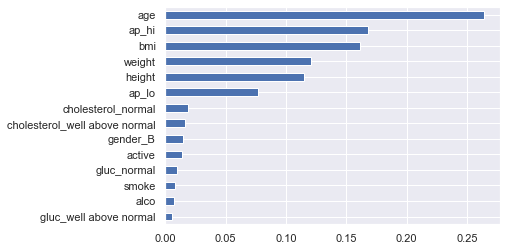

In [146]:
# checking feature importances
rf_clf.fit(X_train_prep, y_train)

feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train_prep.columns)
feat_importances.sort_values().plot(kind='barh')

## 6.3 Checkpoint

# 7.0 Machine Learning Modeling

### Targe variable: `var` (`0` = no cardiovascular disease ; `1` = cardiovascular disease)

## 7.1 Loading data set

In [73]:
# loads the data sets
X_train_prep = pd.read_csv('data/ccd_prep_train.csv', low_memory=False)
X_test_prep = pd.read_csv('data/ccd_prep_test.csv', low_memory=False)
X_train_prep.shape

(49056, 14)

## 7.2 Balancing data for training

In [74]:
# data is already balanced

## 7.3 Training the models and getting the performance metrics

In [143]:
# sets the threshold
THRESHOLD = 0.45

# defines the classifiers
classifiers = [LogisticRegression(max_iter=220, random_state=SEED),
               RandomForestClassifier(random_state=SEED),
               xgb.XGBClassifier(random_state=SEED),
               BalancedRandomForestClassifier(random_state=SEED),
               CatBoostClassifier(random_state=SEED, verbose=False),
               KNeighborsClassifier(n_neighbors=5,  weights='distance',n_jobs=-1),
               SGDClassifier(loss='log', random_state=SEED, n_jobs=-1), 
               LGBMClassifier(random_state=SEED, n_jobs=-1), 
               GaussianNB()]

# calculates classifiers performance
df_performance = gu.get_classifiers_performance(X_train_prep, X_test_prep, np.ravel(y_train), np.ravel(y_test), THRESHOLD, classifiers)

Training LogisticRegression...
Training RandomForestClassifier...
Training XGBClassifier...
Training BalancedRandomForestClassifier...
Training CatBoostClassifier...
Training KNeighborsClassifier...
Training SGDClassifier...
Training LGBMClassifier...
Training GaussianNB...


In [144]:
# highlight max values for each column
df_performance.style.highlight_max(color='darkorange')

,model,accuracy,cohen kappa,F1-Score,F1-Macro,PR AUC
0,LogisticRegression,0.728551,0.456957,0.733025,0.728475,0.789442
2,RandomForestClassifier,0.702318,0.403967,0.716185,0.701605,0.767627
4,XGBClassifier,0.728490,0.456752,0.734450,0.728353,0.790269
6,BalancedRandomForestClassifier,0.706354,0.412151,0.718259,0.705828,0.769240
8,CatBoostClassifier,0.727818,0.455374,0.734380,0.727651,0.795519
10,KNeighborsClassifier,0.680364,0.360142,0.693017,0.679821,0.734933
12,SGDClassifier,0.725922,0.451640,0.731456,0.725805,0.788689
14,LGBMClassifier,0.728246,0.456207,0.735224,0.728057,0.796730
16,GaussianNB,0.693573,0.388882,0.659371,0.690452,0.760995


## 7.4 Confusion Matrix

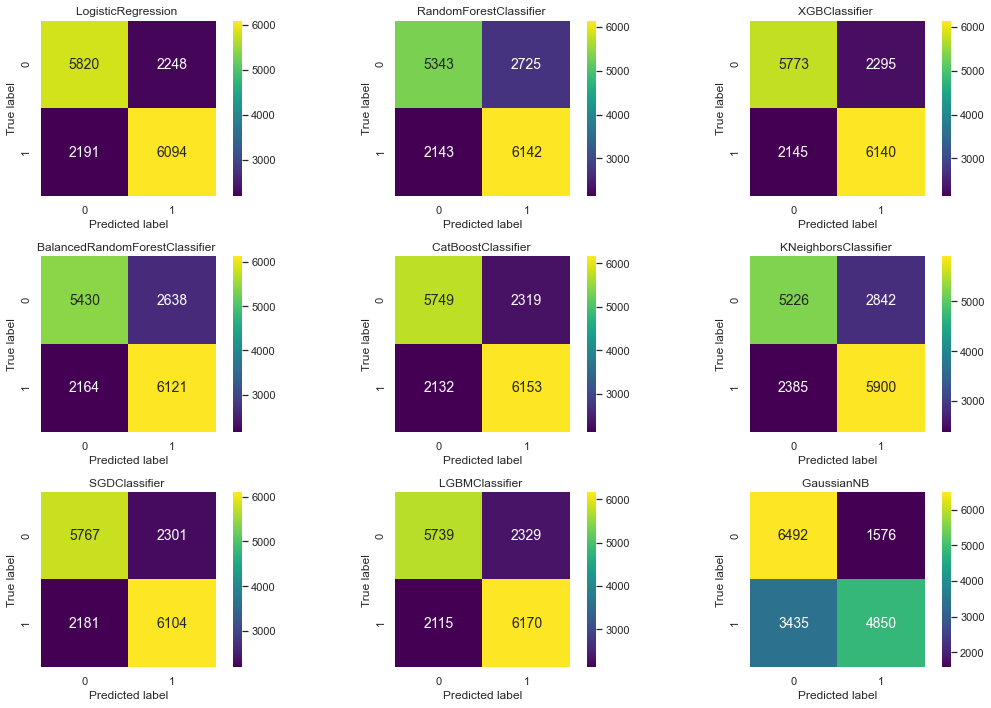

In [147]:
gu.plot_multiple_confusion_matrices(3, 3, X_test_prep, y_test, classifiers, THRESHOLD)

Although, `LogisticRegression` has the highest accuracy, we'll be more human conservative, thus FN is more important than FP. In addition, as we defined on Business Metrics section, the `LGBMClassifier` satisfies the conditions.

## 7.5 PR Curves

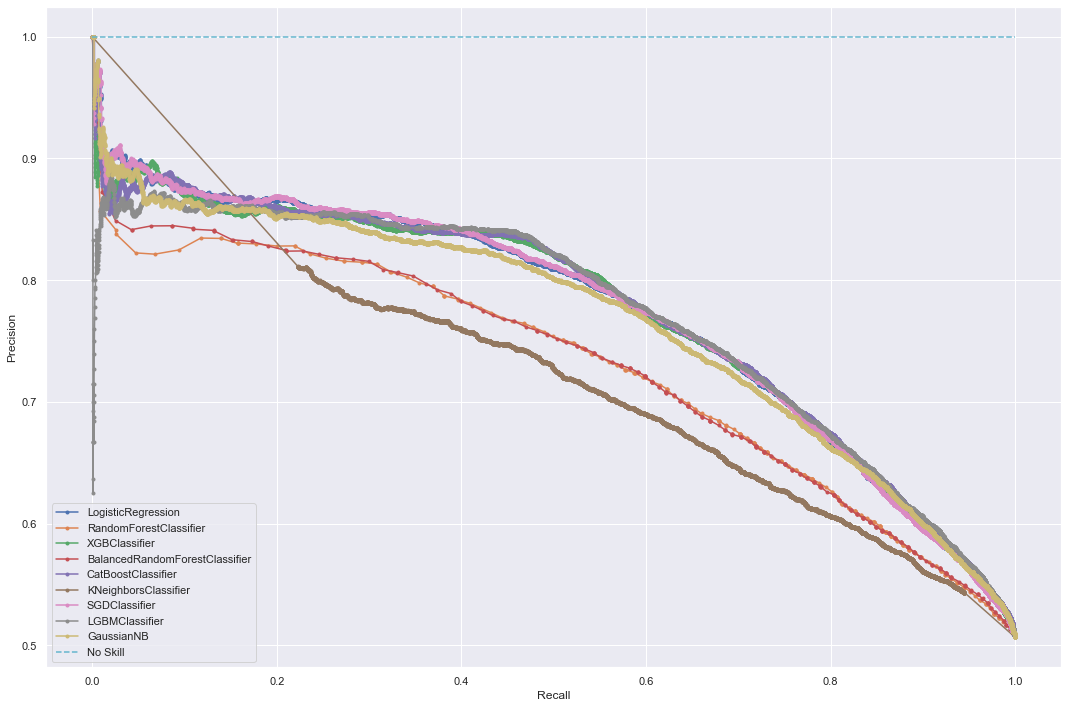

In [137]:
# plots PR Curves
gu.plot_pr_curves(X_test_prep_boruta, y_test, classifiers)

As observed, the PR curves for `LGBMClassifier` and `RandomForestClassifier` are pretty close. However, the Confusion Matrices are different and it helped when deciding which algorithm to choose.

# 8.0 Tuning Best Model

## LGBM Classifier <font color="green"> (chosen as overall best)

## 8.1 Hyperparameter Tunning

In [79]:
# instantiates the classifier
lgbm_clf = LGBMClassifier(random_state=SEED, n_jobs=-1)

In [80]:
# set up space dictionary with specified hyperparameters
space = {'max_depth': np.arange(2, 12, 2), 
         'num_leaves': 2 ** np.arange(2, 10, 2),
         'min_data_in_leaf': np.arange(100, 1050, 50), 
         'learning_rate': np.linspace(0.001, 0.6, 15),
         'colsample_bytree': np.linspace(0.1, 1, 5),
         'subsample': np.linspace(0.25, 1, 15),
         'n_estimators': np.arange(10, 105, 15)}

In [81]:
# preapres RandomizedSearchCV object
lgbm_clf_cv = RandomizedSearchCV(estimator=lgbm_clf, param_distributions=space,
                                scoring='accuracy', n_iter=100, cv=10, verbose=2,
                                random_state=SEED, n_jobs=-1)

In [82]:
# fits the RandomizedSearchCV object
lgbm_clf_cv.fit(X_train_prep, np.ravel(y_train))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.1min finished


[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                                        'learning_rate': array([0.001     , 0.04378571, 0.08657143, 0.12935714, 0.17214286,
       0.21492857, 0.25771429, 0.3005    , 0.34328571, 0.38607143,
       0.42885714, 0.47164286, 0.51442857, 0.55721429, 0.6       ]),
                                        'max_depth': arr...
                                        'min_data_in_leaf': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000]),
                                        'n_estimators': array([ 10,  25,  40,  55,  70,  85, 100]),
                                        'num_leaves': array([  4,  16,  64, 256]),
                                        'subsample': array([0.25      , 0.30357143, 0.357142

In [83]:
# best estimator
lgbm_clf_cv.best_estimator_

LGBMClassifier(colsample_bytree=0.55, learning_rate=0.04378571428571428,
               max_depth=10, min_data_in_leaf=400, num_leaves=64,
               random_state=42, subsample=0.8392857142857143)

## 8.2 Best model predictions & Metrics

In [84]:
# sets the threshold
THRESHOLD = 0.45

# extract the best estimator
lgbm_best_model = lgbm_clf_cv.best_estimator_

# predicts probabilities
lgbm_best_model_probs = lgbm_best_model.predict_proba(X_test_prep)

# calculates classifiers performance
df_performance = gu.get_classifiers_performance(X_train_prep, X_test_prep, 
                                                np.ravel(y_train), np.ravel(y_test), 
                                                THRESHOLD, [lgbm_best_model])

df_performance

Training LGBMClassifier...
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400


,model,accuracy,cohen kappa,F1-Score,F1-Macro,PR AUC
0,LGBMClassifier,0.729713,0.459178,0.736025,0.729559,0.797859


In [85]:
# Print the tuned parameters and score
print("\nTuned Parameters: {}".format(lgbm_clf_cv.best_params_)) 
print("\nBest score: {:.4f}".format(lgbm_clf_cv.best_score_))


Tuned Parameters: {'subsample': 0.8392857142857143, 'num_leaves': 64, 'n_estimators': 100, 'min_data_in_leaf': 400, 'max_depth': 10, 'learning_rate': 0.04378571428571428, 'colsample_bytree': 0.55}

Best score: 0.7342


## 8.3 PR AUC Curve

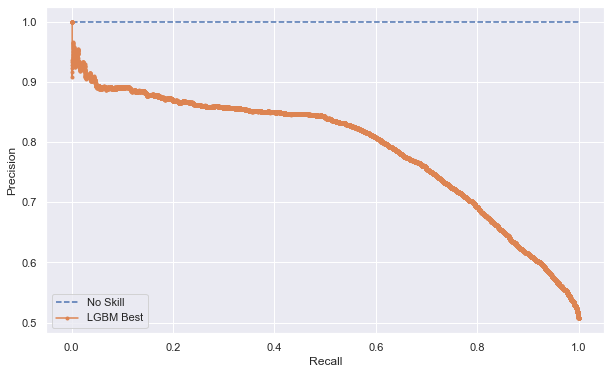

In [86]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(10, 6)

# plots PR AUC
gu.plot_pr_auc(y_test, lgbm_best_model_probs, 'LGBM Best')

## 8.4 Confusion Matrix

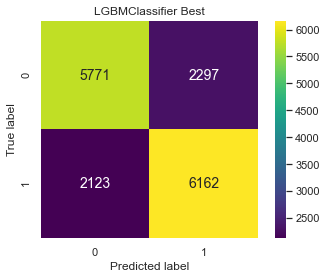

In [87]:
# keeps probabilities for the positive outcome only
df_lgbm_bm_probs = pd.DataFrame(lgbm_best_model_probs[:, 1], columns = ['prob_default'])

# applied the threshold
y_pred_bm = df_lgbm_bm_probs['prob_default'].apply(lambda x: 1 if x > THRESHOLD else 0)

gu.plot_single_confusion_matrix(y_test, y_pred_bm, lgbm_best_model, 'Best')

# displays plot
plt.show()

## 8.5 Cross-validation scoring

Now, we should use cross-validation scoring with `cross_val_score()` to check the overall performance.

In [88]:
# calculates the cross validation scores
cv_scores = cross_val_score(lgbm_best_model, X_train_prep, np.ravel(y_train), cv = 10, n_jobs=-1)

# prints the cross validation scores
print(cv_scores)

[0.73257236 0.73562984 0.74113331 0.72931105 0.72808806 0.73012638
 0.73883792 0.73700306 0.73455657 0.73455657]


In [89]:
# prints the average accuracy and standard deviation of the scores
print("Average accuracy: %0.4f (+/- %0.4f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

Average accuracy: 0.7342 (+/- 0.0080)


## 8.6 Saving the best model

In [99]:
# saves the model
pickle.dump(lgbm_best_model, open('model/best_model_ccd.pkl', 'wb'))

# 9.0 Best Model evaluation

## 9.1 Calibration curves

We need to check the calibration of two models (Calibrated and Non-Calibrated) to **see how stable the default prediction performance is across probabilities**. You can use a chart of each model's calibration to check this by calling the `calibration_curve()` function.

In [90]:
# defines and fits calibration model
calibrated_lgbm_bm = CalibratedClassifierCV(lgbm_best_model, method='isotonic', cv=10)
calibrated_lgbm_bm.fit(X_train_prep, np.ravel(y_train))

# predicts probabilities
calibrated_lgbm_bm_probs = calibrated_lgbm_bm.predict_proba(X_test_prep)

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGB

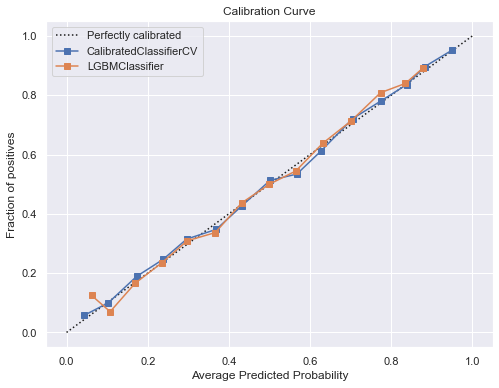

In [91]:
# defines number of bins
BINS = 15

# plots a calibration curve for each model
gu.plot_multiple_calibration_curves([calibrated_lgbm_bm, lgbm_best_model], y_test, 
                                 [calibrated_lgbm_bm_probs, lgbm_best_model_probs], BINS)

# displays the plot
plt.show()

As observed, the Calibrated model is more stable.

## 9.2 Calibrated model metrics

In [92]:
# sets the threshold
THRESHOLD = 0.45

# predicts probabilities
calibrated_lgbm_bm_probs = calibrated_lgbm_bm.predict_proba(X_test_prep)

# calculates classifiers performance
df_performance = gu.get_classifiers_performance(X_train_prep, X_test_prep, 
                                                np.ravel(y_train), np.ravel(y_test), 
                                                THRESHOLD, [calibrated_lgbm_bm])

df_performance

Training CalibratedClassifierCV...
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current v

,model,accuracy,cohen kappa,F1-Score,F1-Macro,PR AUC
0,CalibratedClassifierCV,0.730875,0.461523,0.736798,0.730739,0.797883


In [93]:
# Set the threshold for defaults
THRESHOLD = 0.45

# keeps probabilities for the positive outcome only
df_cal_lgbm_bm_probs = pd.DataFrame(calibrated_lgbm_bm_probs[:,1], columns = ['prob_default'])

# applied the threshold
y_cal_lgbm_bm_pred = df_cal_lgbm_bm_probs['prob_default'].apply(lambda x: 1 if x > THRESHOLD else 0)

# prints the classification report
print(classification_report(y_test, y_cal_lgbm_bm_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      8068
           1       0.73      0.74      0.74      8285

    accuracy                           0.73     16353
   macro avg       0.73      0.73      0.73     16353
weighted avg       0.73      0.73      0.73     16353



## 9.3 Calibrated model - PR Curve

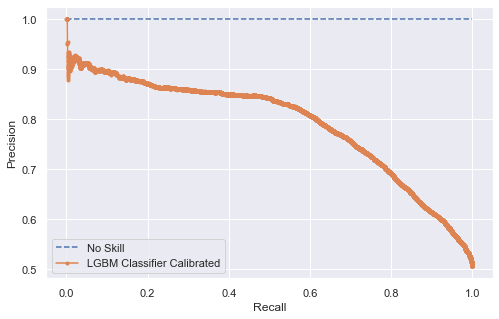

In [94]:
# sets plot size
plt.figure(figsize=(8,5))

# plots the PR curve
gu.plot_pr_auc(y_test, calibrated_lgbm_bm_probs, "LGBM Classifier Calibrated")

## 9.4 Calibrated model - Confusion Matrix

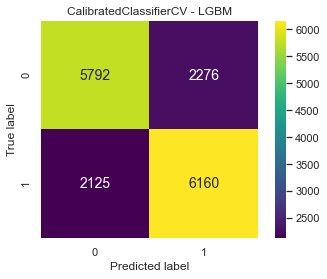

In [95]:
# keeps probabilities for the positive outcome only
df_cal_lgbm_bm_probs = pd.DataFrame(calibrated_lgbm_bm_probs[:,1], columns = ['prob_default'])

# applied the threshold
y_cal_lgbm_bm_pred = df_cal_lgbm_bm_probs['prob_default'].apply(lambda x: 1 if x > THRESHOLD else 0)

# plots confusion matrix
gu.plot_single_confusion_matrix(y_test, y_cal_lgbm_bm_pred, calibrated_lgbm_bm, '- LGBM')

# displays the plot
plt.show()

## 9.5 Calibrated model - cross validation-score

In [148]:
# calculates the cross validation scores
cv_scores = cross_val_score(calibrated_lgbm_bm, X_train_prep, np.ravel(y_train), cv = 10, n_jobs=-1)

# prints the cross validation scores
print(cv_scores)

[0.73033021 0.73420302 0.74113331 0.72808806 0.72727273 0.73114554
 0.73802243 0.73618756 0.73496432 0.73455657]


In [149]:
# prints the average accuracy and standard deviation of the scores
print("Average accuracy: %0.4f (+/- %0.4f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

Average accuracy: 0.7336 (+/- 0.0083)


## 9.6 Saving the calibrated model

In [100]:
# saves the model
pickle.dump(calibrated_lgbm_bm, open('model/calibrated_model_ccd.pkl', 'wb'))

# 10.0 Business performance¶

Let's recap the pricing model. The price of the diagnosis, paid by the client, varies according to the precision achieved by the team of specialists.

| Exam Accuracy | Price  | Rules                                  | Example          |
|:---------------|:---------------------|:---------------------------------------|:----------------|
| Above 50%     | min \$500\.00          | \+\$500 for each additional 5% accuracy | Accuracy = 55% \-> \$1,000\.00 |
| Up to 50%     | $0\.00                | N/A                                    | N/A               |


Our full original data set contains the records of 70,000 patients. Suppose we were to make them go through the clinic procedure to check if they have a cardiovascular disease, our model have reached an accuracy of `0.7336 (+/- 0.0083)` [72.53% , 74.19%] which is higher than the 55% to 65% that we have on today's procedures. Thus, translating it to business numbers.

|| Worst Scenario | Best Scenario |
|---|--------------------------------------|-------------------------------------|
|Today | \$35,000,000                         | \$105,000,000                      |
|Our model | \$157,710,000                         | \$169,330,000                      |

This means that having a portfolio of 70k patients that would go through the clinical procedure to check whether they have or not a cardiovascular disease, in the worst business scenario the portfolio would generate a profit of **\\$157.7 million** and in the best scenario **\$169.33 million**, in contrast to today's procedure that has an accuracy of 65% and would generate a total of \\$105 million, that's a difference of \\$64 million!